In [1]:
%run IDM_helper_functions.ipynb

In [2]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [3]:
import pandas as pd
import os
import scipy.io as sio
import scipy
from statsmodels.stats.anova import AnovaRM
import seaborn as sns


In [4]:
data_path = "/Users/wangjiashun/Desktop/Lexical Decision Data/SpeedAccData.txt"
cols = ["Participant", "Block", "Practice", "SAT", "Stimulus", 
        "Frequency", "Response", "RT", "Censor"]
df = pd.read_fwf(data_path, header=None, names=cols, widths = [2,3,2,2,5,2,2,6,2])
# only include sensored data
df = df[df["Censor"] == 0]

# change type from str to int
df["SAT"] = [-int(i)+2 for i in list(df["SAT"])]

# change type from str to int
df["Frequency"] = [int(i) for i in list(df["Frequency"])]


# change type from str to float
df["RT"] = [float(i) for i in list(df["RT"])]

# remove invalid response
df = df[df["Response"] != -1]

# create a column called correct
df['Correct'] = ((df["Response"]==1) & (df["Frequency"]<3.5)) | ((df["Response"]==0) & (df["Frequency"]>3.5))

# change from boolean to int
df["Correct"] = [int(i) for i in list(df["Correct"])]



In [5]:
df

,Participant,Block,Practice,SAT,Stimulus,Frequency,Response,RT,Censor,Correct
894,1,10,0,2,5798,5,1,0.734,0.0,0
895,1,10,0,2,6554,6,0,0.536,0.0,1
896,1,10,0,2,1177,1,1,0.514,0.0,1
897,1,10,0,2,4796,4,0,0.466,0.0,1
898,1,10,0,2,1299,1,1,0.446,0.0,1
...,...,...,...,...,...,...,...,...,...,...
32027,17,20,0,2,3232,3,1,0.637,0.0,1
32028,17,20,0,2,4696,4,0,0.584,0.0,1
32029,17,20,0,2,2574,2,1,0.824,0.0,1
32030,17,20,0,2,6334,6,0,0.739,0.0,1


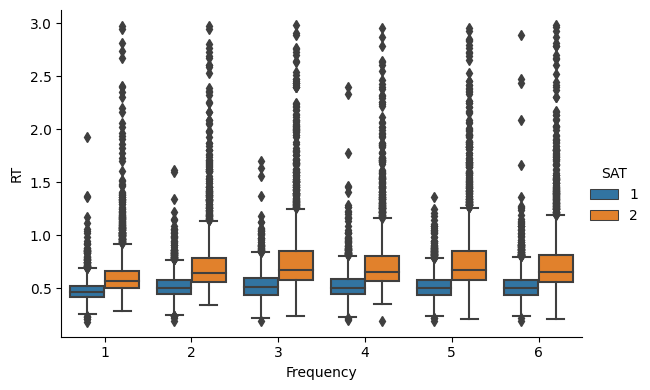

In [6]:

#df_check = df_sub[df_sub.SAT == ]
#df_check = df_sub[df_sub.contrast == 5]

sns.catplot(data=df, x="Frequency", y="RT", hue="SAT", kind="box",
            height=4, aspect=6/4)

In [7]:
rt.shape

NameError: name 'rt' is not defined

In [17]:
df

,Participant,Block,Practice,SAT,Stimulus,Frequency,Response,RT,Censor,Correct
894,1,10,0,2,5798,5,1,0.734,0.0,0
895,1,10,0,2,6554,6,0,0.536,0.0,1
896,1,10,0,2,1177,1,1,0.514,0.0,1
897,1,10,0,2,4796,4,0,0.466,0.0,1
898,1,10,0,2,1299,1,1,0.446,0.0,1
...,...,...,...,...,...,...,...,...,...,...
32027,17,20,0,2,3232,3,1,0.637,0.0,1
32028,17,20,0,2,4696,4,0,0.584,0.0,1
32029,17,20,0,2,2574,2,1,0.824,0.0,1
32030,17,20,0,2,6334,6,0,0.739,0.0,1


In [37]:
# delete participant 2
df[df["Participant"] == "2"]

,Participant,Block,Practice,SAT,Stimulus,Frequency,Response,RT,Censor,Correct


In [26]:
print(df["Participant"] != 2)

894      True
895      True
896      True
897      True
898      True
         ... 
32027    True
32028    True
32029    True
32030    True
32031    True
Name: Participant, Length: 22025, dtype: bool


In [104]:
Participant = 0
Frequency = 0
SAT = 0

In [41]:
i=1
for Participant in range(17):
    if Participant+1 ==2:
        continue
    for Frequency in range(6):
        for SAT in range(2):
            print(i)
            i+=1
    
            df_cond = df[(df["Participant"]==Participant+1)&(df["Frequency"]==Frequency+1)&(df["SAT"]==SAT+1)]

            data_sub = np.stack((np.array((df_cond["RT"])), np.array((df_cond["Correct"]))), axis = 1)
            print(str(Participant+1), str(Frequency+1), str(SAT+1), data_sub.shape)

1
1 1 1 (74, 2)
2
1 1 2 (82, 2)
3
1 2 1 (69, 2)
4
1 2 2 (81, 2)
5
1 3 1 (69, 2)
6
1 3 2 (88, 2)
7
1 4 1 (62, 2)
8
1 4 2 (85, 2)
9
1 5 1 (69, 2)
10
1 5 2 (79, 2)
11
1 6 1 (72, 2)
12
1 6 2 (83, 2)
13
3 1 1 (67, 2)
14
3 1 2 (87, 2)
15
3 2 1 (75, 2)
16
3 2 2 (88, 2)
17
3 3 1 (74, 2)
18
3 3 2 (87, 2)
19
3 4 1 (74, 2)
20
3 4 2 (89, 2)
21
3 5 1 (73, 2)
22
3 5 2 (82, 2)
23
3 6 1 (73, 2)
24
3 6 2 (89, 2)
25
4 1 1 (74, 2)
26
4 1 2 (83, 2)
27
4 2 1 (71, 2)
28
4 2 2 (89, 2)
29
4 3 1 (76, 2)
30
4 3 2 (85, 2)
31
4 4 1 (70, 2)
32
4 4 2 (91, 2)
33
4 5 1 (75, 2)
34
4 5 2 (83, 2)
35
4 6 1 (77, 2)
36
4 6 2 (87, 2)
37
5 1 1 (77, 2)
38
5 1 2 (83, 2)
39
5 2 1 (68, 2)
40
5 2 2 (85, 2)
41
5 3 1 (67, 2)
42
5 3 2 (89, 2)
43
5 4 1 (69, 2)
44
5 4 2 (89, 2)
45
5 5 1 (64, 2)
46
5 5 2 (83, 2)
47
5 6 1 (70, 2)
48
5 6 2 (88, 2)
49
6 1 1 (70, 2)
50
6 1 2 (83, 2)
51
6 2 1 (76, 2)
52
6 2 2 (88, 2)
53
6 3 1 (70, 2)
54
6 3 2 (81, 2)
55
6 4 1 (71, 2)
56
6 4 2 (88, 2)
57
6 5 1 (71, 2)
58
6 5 2 (86, 2)
59
6 6 1 (63, 2)
60
6 6

In [10]:
print(Participant)
print(Frequency)
print(SAT)

1
0
0


In [9]:
data_sub

array([], shape=(0, 2), dtype=float64)

In [42]:
#data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['Frequency', 'SAT', 'Participant', 'v','a','ter','k'],)

i=1
for Participant in range(17):
    if Participant+1 ==2:
        continue
    
    for Frequency in range(6):
        for SAT in range(2):
            print(i)
            i+=1
    
            df_cond = df[(df["Participant"]==Participant+1)&(df["Frequency"]==Frequency+1)&(df["SAT"]==SAT+1)]

            data_sub = np.stack((np.array((df_cond["RT"])), np.array((df_cond["Correct"]))), axis = 1)
            samp = Sample.from_numpy_array(data_sub, column_names = [])

            model_fit = Model(name='Simple model (fitted)',
                          drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                            t = 0,
                                            x=Fittable(minval=-30, maxval=30)),
                          noise=NoiseConstant(noise=1),
                          bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                          overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                          dx=.001, dt=.001, T_dur=3)

            fit_adjust_model(samp, model_fit,
                             fitting_method="differential_evolution",
                             lossfunction=LossRobustBIC, verbose=False)
            
            df_sub = pd.DataFrame(columns = ['Frequency', 'SAT', 'Participant', 'v','a','ter','k'],)

            df_sub = pd.DataFrame({'Frequency':Frequency+1, 
                                   'SAT':SAT+1, 
                                   'participant': Participant + 1,
                                   'v': np.array(model_fit.parameters()['drift']['drift']), 
                                   'a': np.array(model_fit.parameters()['bound']['B']),
                                   'ter': np.array(model_fit.parameters()['overlay']['nondectime']),
                                   'k': np.array(model_fit.parameters()['drift']['x'])
                                  }, index=[i])
            
            df_all = df_all.append(df_sub)

            print(df_sub)


1


Info: Params [ 2.93704093 -1.45569975  0.50091076  0.35283928] gave -100.43380410274693


   Frequency  SAT  participant         v         a       ter       k
2          1    1            1  2.937041  0.500911  0.352839 -1.4557
2


Info: Params [ 3.69454006 -0.24116607  0.51094952  0.37794325] gave -166.03583737712913


   Frequency  SAT  participant        v        a       ter         k
3          1    2            1  3.69454  0.51095  0.377943 -0.241166
3


Info: Params [2.31981929 4.78690565 0.54721183 0.36931207] gave -85.17708098141615


   Frequency  SAT  participant         v         a       ter         k
4          2    1            1  2.319819  0.547212  0.369312  4.786906
4


Info: Params [2.27919339 4.69058719 1.03306164 0.32891663] gave -53.54105867493003


   Frequency  SAT  participant         v         a       ter         k
5          2    2            1  2.279193  1.033062  0.328917  4.690587
5


Info: Params [0.88615832 3.03056099 0.58475715 0.34013158] gave 13.556312534573873


   Frequency  SAT  participant         v         a       ter         k
6          3    1            1  0.886158  0.584757  0.340132  3.030561
6


Info: Params [1.66354764 4.63194918 0.78640649 0.366088  ] gave -29.991341976703985


   Frequency  SAT  participant         v         a       ter         k
7          3    2            1  1.663548  0.786406  0.366088  4.631949
7


Info: Params [ 2.33273578 -0.78073698  0.50156979  0.34041555] gave -50.8986476282701


   Frequency  SAT  participant         v        a       ter         k
8          4    1            1  2.332736  0.50157  0.340416 -0.780737
8


Info: Params [2.67588572 3.25080824 0.56049062 0.38704072] gave -117.64686236933821


   Frequency  SAT  participant         v         a       ter         k
9          4    2            1  2.675886  0.560491  0.387041  3.250808
9


Info: Params [3.34064758 6.1491498  1.40281338 0.28704132] gave -98.86528667174498


    Frequency  SAT  participant         v         a       ter        k
10          5    1            1  3.340648  1.402813  0.287041  6.14915
10


Info: Params [2.65426593 6.74408339 4.05683347 0.17154685] gave -81.39578350905154


    Frequency  SAT  participant         v         a       ter         k
11          5    2            1  2.654266  4.056833  0.171547  6.744083
11


Info: Params [3.26652318 2.51042861 0.64212221 0.33444023] gave -120.52653458421128


    Frequency  SAT  participant         v         a      ter         k
12          6    1            1  3.266523  0.642122  0.33444  2.510429
12


Info: Params [3.17051826 5.26428919 1.16841409 0.31351181] gave -107.90220678319872


    Frequency  SAT  participant         v         a       ter         k
13          6    2            1  3.170518  1.168414  0.313512  5.264289
13


Info: Params [2.57525377 5.33521044 0.78985108 0.29646955] gave -83.09999212369787


    Frequency  SAT  participant         v         a      ter        k
14          1    1            3  2.575254  0.789851  0.29647  5.33521
14


Info: Params [3.18842952 4.67941522 3.11246368 0.23849172] gave -105.00032424445544


    Frequency  SAT  participant        v         a       ter         k
15          1    2            3  3.18843  3.112464  0.238492  4.679415
15


Info: Params [1.45404179 5.8601536  0.74916314 0.30557601] gave -35.254705952516545


    Frequency  SAT  participant         v         a       ter         k
16          2    1            3  1.454042  0.749163  0.305576  5.860154
16


Info: Params [2.00935255 2.14271333 1.17315068 0.32468865] gave 2.499168567940572


    Frequency  SAT  participant         v         a       ter         k
17          2    2            3  2.009353  1.173151  0.324689  2.142713
17


Info: Params [1.45689881 4.65453009 0.77119144 0.29485252] gave -13.026129100429305


    Frequency  SAT  participant         v         a       ter        k
18          3    1            3  1.456899  0.771191  0.294853  4.65453
18


Info: Params [1.81369945 3.50515996 1.76016765 0.30133344] gave 30.24159047051924


    Frequency  SAT  participant         v         a       ter        k
19          3    2            3  1.813699  1.760168  0.301333  3.50516
19


Info: Params [1.81793663 6.49435535 4.17383933 0.10281404] gave -29.54900237788122


    Frequency  SAT  participant         v         a       ter         k
20          4    1            3  1.817937  4.173839  0.102814  6.494355
20


Info: Params [2.09519884 1.57709996 2.06585276 0.10006881] gave 32.912419256770356


    Frequency  SAT  participant         v         a       ter       k
21          4    2            3  2.095199  2.065853  0.100069  1.5771
21


Info: Params [2.98624694 2.10623572 0.79311112 0.28370225] gave -89.0484156876264


    Frequency  SAT  participant         v         a       ter         k
22          5    1            3  2.986247  0.793111  0.283702  2.106236
22


Info: Params [2.10639255 2.28778277 2.45230507 0.15206516] gave 36.30578014101056


    Frequency  SAT  participant         v         a       ter         k
23          5    2            3  2.106393  2.452305  0.152065  2.287783
23


Info: Params [2.60380377 4.97983016 1.02234779 0.29543342] gave -73.91894145680541


    Frequency  SAT  participant         v         a       ter        k
24          6    1            3  2.603804  1.022348  0.295433  4.97983
24


Info: Params [2.20448036 1.4213003  1.35590579 0.28422696] gave 7.708437923953479


    Frequency  SAT  participant        v         a       ter       k
25          6    2            3  2.20448  1.355906  0.284227  1.4213
25


Info: Params [3.67809012 9.3823368  0.63897675 0.31402858] gave -180.23208701436968


    Frequency  SAT  participant        v         a       ter         k
26          1    1            4  3.67809  0.638977  0.314029  9.382337
26


Info: Params [3.56684726 4.07569914 1.25864149 0.26903243] gave -129.39349245940258


    Frequency  SAT  participant         v         a       ter         k
27          1    2            4  3.566847  1.258641  0.269032  4.075699
27


Info: Params [2.35000759 8.02423097 0.62667783 0.31747693] gave -104.37670787131054


    Frequency  SAT  participant         v         a       ter         k
28          2    1            4  2.350008  0.626678  0.317477  8.024231
28


Info: Params [3.18805075 1.3127012  0.81034845 0.33573065] gave -115.68987980944271


    Frequency  SAT  participant         v         a       ter         k
29          2    2            4  3.188051  0.810348  0.335731  1.312701
29


Info: Params [1.58437119 5.01428328 0.50544014 0.32839573] gave -66.61342505124824


    Frequency  SAT  participant         v        a       ter         k
30          3    1            4  1.584371  0.50544  0.328396  5.014283
30


Info: Params [1.9843048  3.52478613 1.01157918 0.30550849] gave -24.982438296744697


    Frequency  SAT  participant         v         a       ter         k
31          3    2            4  1.984305  1.011579  0.305508  3.524786
31


Info: Params [3.54841053 7.72756467 0.74360038 0.3277233 ] gave -151.60337227617472


    Frequency  SAT  participant         v       a       ter         k
32          4    1            4  3.548411  0.7436  0.327723  7.727565
32


Info: Params [3.03494294 3.52526431 2.01934936 0.20639323] gave -87.78783220198258


    Frequency  SAT  participant         v         a       ter         k
33          4    2            4  3.034943  2.019349  0.206393  3.525264
33


Info: Params [3.41662016 5.89101231 0.62450719 0.31806607] gave -150.8614664233362


    Frequency  SAT  participant        v         a       ter         k
34          5    1            4  3.41662  0.624507  0.318066  5.891012
34


Info: Params [ 2.5314447  -4.76075027  0.50215251  0.36153486] gave -54.389504627784866


    Frequency  SAT  participant         v         a       ter        k
35          5    2            4  2.531445  0.502153  0.361535 -4.76075
35


Info: Params [3.12739159 6.21940703 0.59675676 0.31294837] gave -149.15273881788107


    Frequency  SAT  participant         v         a       ter         k
36          6    1            4  3.127392  0.596757  0.312948  6.219407
36


Info: Params [2.30229527 4.6600121  1.11908838 0.29863078] gave -49.932793841235416


    Frequency  SAT  participant         v         a       ter         k
37          6    2            4  2.302295  1.119088  0.298631  4.660012
37


Info: Params [3.92188755 7.99829    0.68322977 0.31030053] gave -192.3092528628506


    Frequency  SAT  participant         v        a       ter        k
38          1    1            5  3.921888  0.68323  0.310301  7.99829
38


Info: Params [3.73819902 0.91944124 1.1494621  0.32380398] gave -105.15111869829235


    Frequency  SAT  participant         v         a       ter         k
39          1    2            5  3.738199  1.149462  0.323804  0.919441
39


Info: Params [ 3.71006568 10.30977211  1.45709206  0.29471496] gave -148.63005582685636


    Frequency  SAT  participant         v         a       ter          k
40          2    1            5  3.710066  1.457092  0.294715  10.309772
40


Info: Params [2.55846388 6.83196969 5.48569617 0.20780508] gave -79.28725232977462


    Frequency  SAT  participant         v         a       ter        k
41          2    2            5  2.558464  5.485696  0.207805  6.83197
41


Info: Params [2.19468576 7.2357873  0.7742957  0.32297248] gave -75.82346262348894


    Frequency  SAT  participant         v         a       ter         k
42          3    1            5  2.194686  0.774296  0.322972  7.235787
42


Info: Params [3.08799951 5.67938928 2.53792911 0.31849082] gave -114.73020483877877


    Frequency  SAT  participant      v         a       ter         k
43          3    2            5  3.088  2.537929  0.318491  5.679389
43


Info: Params [4.64692965 3.61381339 1.03537244 0.30728066] gave -158.96926776896748


    Frequency  SAT  participant        v         a       ter         k
44          4    1            5  4.64693  1.035372  0.307281  3.613813
44


Info: Params [3.21582416 4.93180068 3.28799336 0.25027109] gave -111.68521781844555


    Frequency  SAT  participant         v         a       ter         k
45          4    2            5  3.215824  3.287993  0.250271  4.931801
45


Info: Params [ 4.22734081 14.9024416   1.1061625   0.34435993] gave -172.60797002666789


    Frequency  SAT  participant         v         a      ter          k
46          5    1            5  4.227341  1.106162  0.34436  14.902442
46


Info: Params [2.5740012  3.74096551 1.19425893 0.40998532] gave -58.123182546144726


    Frequency  SAT  participant         v         a       ter         k
47          5    2            5  2.574001  1.194259  0.409985  3.740966
47


Info: Params [ 2.69225279 13.10007915  9.20253551  0.16252562] gave -131.26765366947765


    Frequency  SAT  participant         v         a       ter          k
48          6    1            5  2.692253  9.202536  0.162526  13.100079
48


Info: Params [2.60437019 4.64296654 1.39574723 0.36380369] gave -69.85507919261073


    Frequency  SAT  participant        v         a       ter         k
49          6    2            5  2.60437  1.395747  0.363804  4.642967
49


Info: Params [2.10616105 7.73785753 1.1177265  0.22388991] gave -83.90203212795284


    Frequency  SAT  participant         v         a      ter         k
50          1    1            6  2.106161  1.117727  0.22389  7.737858
50


Info: Params [2.86292159 4.29894551 0.90890485 0.34250799] gave -103.95936184286091


    Frequency  SAT  participant         v         a       ter         k
51          1    2            6  2.862922  0.908905  0.342508  4.298946
51


Info: Params [1.1616524  8.20882078 2.90750816 0.10021826] gave -32.128901853402866


    Frequency  SAT  participant         v         a       ter         k
52          2    1            6  1.161652  2.907508  0.100218  8.208821
52


Info: Params [2.28173362 4.29789648 0.92081598 0.39451277] gave -55.64738487534828


    Frequency  SAT  participant         v         a       ter         k
53          2    2            6  2.281734  0.920816  0.394513  4.297896
53


Info: Params [0.27697367 7.63290412 2.40249492 0.1007075 ] gave 10.942476710033867


    Frequency  SAT  participant         v         a       ter         k
54          3    1            6  0.276974  2.402495  0.100708  7.632904
54


Info: Params [1.52327154 2.32473023 0.68178345 0.41906592] gave 4.767742731757348


    Frequency  SAT  participant         v         a       ter        k
55          3    2            6  1.523272  0.681783  0.419066  2.32473
55


Info: Params [0.73223713 7.37392098 2.38817552 0.10015057] gave -1.3443273547795513


    Frequency  SAT  participant         v         a       ter         k
56          4    1            6  0.732237  2.388176  0.100151  7.373921
56


Info: Params [2.54961927 4.03474841 3.64066903 0.16191383] gave -46.148872688177946


    Frequency  SAT  participant         v         a       ter         k
57          4    2            6  2.549619  3.640669  0.161914  4.034748
57


Info: Params [0.78512325 7.45295559 1.09485288 0.22511138] gave -6.8056772070599045


    Frequency  SAT  participant         v         a       ter         k
58          5    1            6  0.785123  1.094853  0.225111  7.452956
58


Info: Params [2.36149813 3.79056166 1.11100552 0.34932287] gave -41.94438805496612


    Frequency  SAT  participant         v         a       ter         k
59          5    2            6  2.361498  1.111006  0.349323  3.790562
59


Info: Params [0.57147079 6.00300204 1.75080322 0.10059249] gave 24.244714507599745


    Frequency  SAT  participant         v         a       ter         k
60          6    1            6  0.571471  1.750803  0.100592  6.003002
60


Info: Params [2.48843463 3.17460267 1.05856373 0.32563719] gave -62.30162537753776


    Frequency  SAT  participant         v         a       ter         k
61          6    2            6  2.488435  1.058564  0.325637  3.174603
61


Info: Params [0.20521726 6.67146373 1.63610316 0.10061933] gave 23.521714233836626


    Frequency  SAT  participant         v         a       ter         k
62          1    1            7  0.205217  1.636103  0.100619  6.671464
62


Info: Params [2.09385236 3.60174202 1.04997426 0.23231839] gave -39.69666530743321


    Frequency  SAT  participant         v         a       ter         k
63          1    2            7  2.093852  1.049974  0.232318  3.601742
63


Info: Params [0.         8.45328541 2.56730127 0.10017366] gave 4.519933858458014


    Frequency  SAT  participant    v         a       ter         k
64          2    1            7  0.0  2.567301  0.100174  8.453285
64


Info: Params [1.44227843 4.0184469  0.84234795 0.29398097] gave -1.11799997106678


    Frequency  SAT  participant         v         a       ter         k
65          2    2            7  1.442278  0.842348  0.293981  4.018447
65


Info: Params [0.         7.22129755 1.87355659 0.10042728] gave 17.83959016628642


    Frequency  SAT  participant    v         a       ter         k
66          3    1            7  0.0  1.873557  0.100427  7.221298
66


Info: Params [0.62763349 4.91538071 2.74769808 0.10049582] gave 66.26876479098917


    Frequency  SAT  participant         v         a       ter         k
67          3    2            7  0.627633  2.747698  0.100496  4.915381
67


Info: Params [1.71939033 6.76957955 1.16959107 0.18952614] gave -37.51053775860515


    Frequency  SAT  participant        v         a       ter        k
68          4    1            7  1.71939  1.169591  0.189526  6.76958
68


Info: Params [1.65630468 3.52417689 1.3107311  0.24154573] gave 27.65851538335022


    Frequency  SAT  participant         v         a       ter         k
69          4    2            7  1.656305  1.310731  0.241546  3.524177
69


Info: Params [2.1928252  7.07550763 1.54248105 0.16734048] gave -68.79556328512844


    Frequency  SAT  participant         v         a      ter         k
70          5    1            7  2.192825  1.542481  0.16734  7.075508
70


Info: Params [1.46927302 4.63078619 1.2419654  0.27844809] gave 24.89465283360103


    Frequency  SAT  participant         v         a       ter         k
71          5    2            7  1.469273  1.241965  0.278448  4.630786
71


Info: Params [1.82342174 6.34673854 1.06119815 0.20526221] gave -42.92021051060295


    Frequency  SAT  participant         v         a       ter         k
72          6    1            7  1.823422  1.061198  0.205262  6.346739
72


Info: Params [1.85162112 3.49281423 0.95157125 0.3017143 ] gave -12.447552615500872


    Frequency  SAT  participant         v         a       ter         k
73          6    2            7  1.851621  0.951571  0.301714  3.492814
73


Info: Params [0.54587507 5.57036888 1.57251546 0.1002016 ] gave 38.0689883160162


    Frequency  SAT  participant         v         a       ter         k
74          1    1            8  0.545875  1.572515  0.100202  5.570369
74


Info: Params [2.05750032 1.9533988  1.45301963 0.31411929] gave 28.98224706535529


    Frequency  SAT  participant       v        a       ter         k
75          1    2            8  2.0575  1.45302  0.314119  1.953399
75


Info: Params [0.         5.40260575 1.42723317 0.1005149 ] gave 55.14808193438206


    Frequency  SAT  participant    v         a       ter         k
76          2    1            8  0.0  1.427233  0.100515  5.402606
76


Info: Params [0.91095192 2.14813455 2.00079332 0.21126248] gave 155.87232490986304


    Frequency  SAT  participant         v         a       ter         k
77          2    2            8  0.910952  2.000793  0.211262  2.148135
77


Info: Params [0.         5.36694159 1.64585245 0.10040807] gave 58.510305364623605


    Frequency  SAT  participant    v         a       ter         k
78          3    1            8  0.0  1.645852  0.100408  5.366942
78


Info: Params [0.38303683 2.1980257  2.04469407 0.11848198] gave 203.26820351115657


    Frequency  SAT  participant         v         a       ter         k
79          3    2            8  0.383037  2.044694  0.118482  2.198026
79


Info: Params [0.45506158 5.40576128 1.59764127 0.10016688] gave 55.80621518436361


    Frequency  SAT  participant         v         a       ter         k
80          4    1            8  0.455062  1.597641  0.100167  5.405761
80


Info: Params [1.0595807  1.35812821 1.72780442 0.15644932] gave 178.90923014079542


    Frequency  SAT  participant         v         a       ter         k
81          4    2            8  1.059581  1.727804  0.156449  1.358128
81


Info: Params [0.3412251  5.95339717 1.77890888 0.10039739] gave 38.068016043609035


    Frequency  SAT  participant         v         a       ter         k
82          5    1            8  0.341225  1.778909  0.100397  5.953397
82


Info: Params [1.28304086 1.21686176 1.84435156 0.10055596] gave 141.43761848280715


    Frequency  SAT  participant         v         a       ter         k
83          5    2            8  1.283041  1.844352  0.100556  1.216862
83


Info: Params [0.08539295 5.86496394 1.88851399 0.10125781] gave 43.74082104558646


    Frequency  SAT  participant         v         a       ter         k
84          6    1            8  0.085393  1.888514  0.101258  5.864964
84


Info: Params [1.23982729 1.02292657 1.62220094 0.10062772] gave 154.42872377644463


    Frequency  SAT  participant         v         a       ter         k
85          6    2            8  1.239827  1.622201  0.100628  1.022927
85


Info: Params [3.85806203 8.58309813 0.75243731 0.36587334] gave -187.2664486558781


    Frequency  SAT  participant         v         a       ter         k
86          1    1            9  3.858062  0.752437  0.365873  8.583098
86


Info: Params [2.7016386  3.46583958 1.21653339 0.34586958] gave -75.49070005219987


    Frequency  SAT  participant         v         a      ter        k
87          1    2            9  2.701639  1.216533  0.34587  3.46584
87


Info: Params [1.7716135  8.91322048 0.62567204 0.37457091] gave -83.25383282386227


    Frequency  SAT  participant         v         a       ter        k
88          2    1            9  1.771613  0.625672  0.374571  8.91322
88


Info: Params [1.94346923 2.32715597 1.66239067 0.27478539] gave 49.53805908497311


    Frequency  SAT  participant         v         a       ter         k
89          2    2            9  1.943469  1.662391  0.274785  2.327156
89


Info: Params [ 0.83079386 11.51651319  4.0324117   0.24742894] gave -50.17245876725264


    Frequency  SAT  participant         v         a       ter          k
90          3    1            9  0.830794  4.032412  0.247429  11.516513
90


Info: Params [1.31419087 2.48434672 1.14103079 0.3528476 ] gave 82.52130784706286


    Frequency  SAT  participant         v         a       ter         k
91          3    2            9  1.314191  1.141031  0.352848  2.484347
91


Info: Params [ 3.21083492 -1.16257664  0.50577524  0.37919023] gave -120.98380131921098


    Frequency  SAT  participant         v         a      ter         k
92          4    1            9  3.210835  0.505775  0.37919 -1.162577
92


Info: Params [ 2.10414522 -0.71000843  0.72505275  0.42089877] gave -1.3288131492767405


    Frequency  SAT  participant         v         a       ter         k
93          4    2            9  2.104145  0.725053  0.420899 -0.710008
93


Info: Params [2.84535872 9.73888254 9.18718133 0.15420301] gave -116.49075803623991


    Frequency  SAT  participant         v         a       ter         k
94          5    1            9  2.845359  9.187181  0.154203  9.738883
94


Info: Params [1.82356342 3.01890177 3.05160198 0.10037853] gave 40.17359519130459


    Frequency  SAT  participant         v         a       ter         k
95          5    2            9  1.823563  3.051602  0.100379  3.018902
95


Info: Params [3.08252994 4.15046663 0.52137453 0.39504198] gave -140.75208682239509


    Frequency  SAT  participant        v         a       ter         k
96          6    1            9  3.08253  0.521375  0.395042  4.150467
96


Info: Params [ 2.82523668 -6.44497259  0.57978953  0.43241693] gave -24.16113988533163


    Frequency  SAT  participant         v        a       ter         k
97          6    2            9  2.825237  0.57979  0.432417 -6.444973
97


Info: Params [2.60689224 4.70112166 0.61651144 0.28667604] gave -232.87837702886753


    Frequency  SAT  participant         v         a       ter         k
98          1    1           10  2.606892  0.616511  0.286676  4.701122
98


Info: Params [4.08839658 4.15291884 1.40003031 0.29933277] gave -313.3449024076473


    Frequency  SAT  participant         v        a       ter         k
99          1    2           10  4.088397  1.40003  0.299333  4.152919
99


Info: Params [1.28629895 7.43286998 1.0461877  0.24715415] gave -87.07809473741224


     Frequency  SAT  participant         v         a       ter        k
100          2    1           10  1.286299  1.046188  0.247154  7.43287
100


Info: Params [2.65770848 3.91171578 1.43102239 0.28679811] gave -152.41186059241218


     Frequency  SAT  participant         v         a       ter         k
101          2    2           10  2.657708  1.431022  0.286798  3.911716
101


Info: Params [0.56381189 7.426855   0.83096602 0.25836997] gave -22.993945308400733


     Frequency  SAT  participant         v         a      ter         k
102          3    1           10  0.563812  0.830966  0.25837  7.426855
102


Info: Params [1.8575692  4.39262392 1.05652549 0.33433338] gave -47.41812292588082


     Frequency  SAT  participant         v         a       ter         k
103          3    2           10  1.857569  1.056525  0.334333  4.392624
103


Info: Params [2.10721206 4.89173369 0.78377214 0.25425683] gave -137.41669860152078


     Frequency  SAT  participant         v         a       ter         k
104          4    1           10  2.107212  0.783772  0.254257  4.891734
104


Info: Params [2.4163075  2.8458483  1.08072422 0.31462025] gave -82.64432999878143


     Frequency  SAT  participant         v         a      ter         k
105          4    2           10  2.416307  1.080724  0.31462  2.845848
105


Info: Params [2.34190492 5.96599357 1.04840661 0.23532747] gave -178.22249069223122


     Frequency  SAT  participant         v         a       ter         k
106          5    1           10  2.341905  1.048407  0.235327  5.965994
106


Info: Params [2.4104922  2.69723419 1.55186701 0.25888496] gave -53.21749148495516


     Frequency  SAT  participant         v         a       ter         k
107          5    2           10  2.410492  1.551867  0.258885  2.697234
107


Info: Params [2.47959753 3.41051808 0.6847627  0.26713336] gave -169.73237856677596


     Frequency  SAT  participant         v         a       ter         k
108          6    1           10  2.479598  0.684763  0.267133  3.410518
108


Info: Params [2.67938316 2.55041625 1.16096874 0.3091671 ] gave -125.52615068489159


     Frequency  SAT  participant         v         a       ter         k
109          6    2           10  2.679383  1.160969  0.309167  2.550416
109


Info: Params [3.3860918  8.35698078 0.75394817 0.32652121] gave -324.9097225236873


     Frequency  SAT  participant         v         a       ter         k
110          1    1           11  3.386092  0.753948  0.326521  8.356981
110


Info: Params [3.84466957 2.50905212 0.78933431 0.3516962 ] gave -307.66442721136815


     Frequency  SAT  participant        v         a       ter         k
111          1    2           11  3.84467  0.789334  0.351696  2.509052
111


Info: Params [1.01785245 9.03301786 1.06976857 0.2947594 ] gave -86.53367799160074


     Frequency  SAT  participant         v         a       ter         k
112          2    1           11  1.017852  1.069769  0.294759  9.033018
112


Info: Params [2.35843872 5.37497732 0.94427937 0.37109083] gave -155.8001241455672


     Frequency  SAT  participant         v         a       ter         k
113          2    2           11  2.358439  0.944279  0.371091  5.374977
113


Info: Params [ 0.73246726 10.35026874  1.19367626  0.28420615] gave -94.16741469970363


     Frequency  SAT  participant         v         a       ter          k
114          3    1           11  0.732467  1.193676  0.284206  10.350269
114


Info: Params [1.4904179  4.94606213 1.30620692 0.31327785] gave 20.084184308943


     Frequency  SAT  participant         v         a       ter         k
115          3    2           11  1.490418  1.306207  0.313278  4.946062
115


Info: Params [1.4086281  6.29437812 0.72438421 0.32282969] gave -92.85297786716309


     Frequency  SAT  participant         v         a      ter         k
116          4    1           11  1.408628  0.724384  0.32283  6.294378
116


Info: Params [2.40018723 4.90754648 2.51270212 0.23609198] gave -105.95372800661067


     Frequency  SAT  participant         v         a       ter         k
117          4    2           11  2.400187  2.512702  0.236092  4.907546
117


Info: Params [1.98652076 7.23466294 0.8252377  0.3145865 ] gave -161.19232475247975


     Frequency  SAT  participant         v         a       ter         k
118          5    1           11  1.986521  0.825238  0.314587  7.234663
118


Info: Params [2.66203272 2.33131069 1.02637711 0.35715069] gave -135.38874680102444


     Frequency  SAT  participant         v         a       ter         k
119          5    2           11  2.662033  1.026377  0.357151  2.331311
119


Info: Params [2.27431053 6.48421569 0.75594044 0.33295424] gave -185.10757182746158


     Frequency  SAT  participant         v        a       ter         k
120          6    1           11  2.274311  0.75594  0.332954  6.484216
120


Info: Params [2.30700519 2.5051288  0.90007947 0.35574782] gave -93.2556727943676


     Frequency  SAT  participant         v         a       ter         k
121          6    2           11  2.307005  0.900079  0.355748  2.505129
121


Info: Params [1.87419308 5.26381755 1.71750044 0.15770861] gave -106.06154982001699


     Frequency  SAT  participant         v       a       ter         k
122          1    1           12  1.874193  1.7175  0.157709  5.263818
122


Info: Params [2.31962509 2.55719251 0.9976255  0.28335843] gave -83.81950580342641


     Frequency  SAT  participant         v         a       ter         k
123          1    2           12  2.319625  0.997626  0.283358  2.557193
123


Info: Params [1.27233877 6.75024146 1.07589731 0.27238258] gave -63.862253467097375


     Frequency  SAT  participant         v         a       ter         k
124          2    1           12  1.272339  1.075897  0.272383  6.750241
124


Info: Params [1.21894211 2.77991023 1.05169381 0.30529647] gave 120.07875785430667


     Frequency  SAT  participant         v         a       ter        k
125          2    2           12  1.218942  1.051694  0.305296  2.77991
125


Info: Params [0.24921862 7.84993353 3.83626443 0.10091269] gave 9.793488025195042


     Frequency  SAT  participant         v         a       ter         k
126          3    1           12  0.249219  3.836264  0.100913  7.849934
126


Info: Params [0.81239748 1.35126565 0.82617474 0.30721085] gave 203.1005661103117


     Frequency  SAT  participant         v         a       ter         k
127          3    2           12  0.812397  0.826175  0.307211  1.351266
127


Info: Params [1.33324099 4.48147496 2.21923801 0.10105461] gave 39.20750272874127


     Frequency  SAT  participant         v         a       ter         k
128          4    1           12  1.333241  2.219238  0.101055  4.481475
128


Info: Params [1.56888553 2.76647608 1.39180896 0.22551043] gave 89.40401384061451


     Frequency  SAT  participant         v         a      ter         k
129          4    2           12  1.568886  1.391809  0.22551  2.766476
129


Info: Params [1.2001885  6.16876278 3.0839358  0.10035148] gave -23.084455413765177


     Frequency  SAT  participant         v         a       ter         k
130          5    1           12  1.200189  3.083936  0.100351  6.168763
130


Info: Params [1.64588792 1.77303603 1.0617531  0.28861463] gave 83.0237497426377


     Frequency  SAT  participant         v         a       ter         k
131          5    2           12  1.645888  1.061753  0.288615  1.773036
131


Info: Params [1.56414609 5.57957231 2.40102205 0.14801681] gave -38.217400725574116


     Frequency  SAT  participant         v         a       ter         k
132          6    1           12  1.564146  2.401022  0.148017  5.579572
132


Info: Params [1.53100334 2.62274209 1.90933729 0.13868823] gave 119.72526124471484


     Frequency  SAT  participant         v         a       ter         k
133          6    2           12  1.531003  1.909337  0.138688  2.622742
133


Info: Params [1.82670541 5.89884991 0.92531022 0.29246978] gave -112.06176539140932


     Frequency  SAT  participant         v        a      ter        k
134          1    1           13  1.826705  0.92531  0.29247  5.89885
134


Info: Params [2.06420971 2.53744249 1.30304066 0.28026802] gave 21.46178596742035


     Frequency  SAT  participant        v         a       ter         k
135          1    2           13  2.06421  1.303041  0.280268  2.537442
135


Info: Params [1.29222885 6.82449648 1.09008561 0.29852457] gave -52.05227501168194


     Frequency  SAT  participant         v         a       ter         k
136          2    1           13  1.292229  1.090086  0.298525  6.824496
136


Info: Params [1.61074613 1.6285093  0.92958762 0.37579185] gave 61.56676567255577


     Frequency  SAT  participant         v         a       ter         k
137          2    2           13  1.610746  0.929588  0.375792  1.628509
137


Info: Params [0.27224673 7.32131307 2.29549545 0.20690092] gave 29.33687167977365


     Frequency  SAT  participant         v         a       ter         k
138          3    1           13  0.272247  2.295495  0.206901  7.321313
138


Info: Params [0.84972687 2.61648403 1.22947779 0.29150085] gave 213.39261154347403


     Frequency  SAT  participant         v         a       ter         k
139          3    2           13  0.849727  1.229478  0.291501  2.616484
139


Info: Params [1.34165066 6.61513378 1.3930685  0.26976323] gave -36.21792253657896


     Frequency  SAT  participant         v         a       ter         k
140          4    1           13  1.341651  1.393069  0.269763  6.615134
140


Info: Params [1.5753227  1.44279682 1.11129987 0.3171229 ] gave 110.47272324793067


     Frequency  SAT  participant         v       a       ter         k
141          4    2           13  1.575323  1.1113  0.317123  1.442797
141


Info: Params [1.81495652 5.36137988 1.10234686 0.29068908] gave -72.34948877583892


     Frequency  SAT  participant         v         a       ter        k
142          5    1           13  1.814957  1.102347  0.290689  5.36138
142


Info: Params [1.53845365 1.36572228 1.03368602 0.35385799] gave 110.75003243885449


     Frequency  SAT  participant         v         a       ter         k
143          5    2           13  1.538454  1.033686  0.353858  1.365722
143


Info: Params [1.63979949 3.20629307 1.25790156 0.22400431] gave -12.964222746542042


     Frequency  SAT  participant         v         a       ter         k
144          6    1           13  1.639799  1.257902  0.224004  3.206293
144


Info: Params [1.48114942 2.1815519  1.066971   0.32771597] gave 106.40401450284848


     Frequency  SAT  participant         v         a       ter         k
145          6    2           13  1.481149  1.066971  0.327716  2.181552
145


Info: Params [3.12475459 3.78602659 0.89900678 0.26698866] gave -230.64959425615262


     Frequency  SAT  participant         v         a       ter         k
146          1    1           14  3.124755  0.899007  0.266989  3.786027
146


Info: Params [2.58792954 2.75413845 1.81087582 0.22092786] gave -82.29625336337892


     Frequency  SAT  participant        v         a       ter         k
147          1    2           14  2.58793  1.810876  0.220928  2.754138
147


Info: Params [2.01820159 6.09931437 1.15364474 0.27060271] gave -115.25710243379176


     Frequency  SAT  participant         v         a       ter         k
148          2    1           14  2.018202  1.153645  0.270603  6.099314
148


Info: Params [1.76412594 2.45073957 1.39193565 0.29822956] gave 85.7608855792515


     Frequency  SAT  participant         v         a      ter        k
149          2    2           14  1.764126  1.391936  0.29823  2.45074
149


Info: Params [1.36131997 6.62405929 1.10216193 0.29183147] gave -48.21120600680458


     Frequency  SAT  participant        v         a       ter         k
150          3    1           14  1.36132  1.102162  0.291831  6.624059
150


Info: Params [1.31214869 2.31191284 1.96878286 0.17048701] gave 203.5258030432085


     Frequency  SAT  participant         v         a       ter         k
151          3    2           14  1.312149  1.968783  0.170487  2.311913
151


Info: Params [2.21057519 3.96004    1.22826328 0.30250895] gave -132.9130965337979


     Frequency  SAT  participant         v         a       ter        k
152          4    1           14  2.210575  1.228263  0.302509  3.96004
152


Info: Params [  3.25427818 -14.29906511   0.50056086   0.48900021] gave 12.712658504464333


     Frequency  SAT  participant         v         a    ter          k
153          4    2           14  3.254278  0.500561  0.489 -14.299065
153


Info: Params [1.48111879 5.42916782 1.47361743 0.2391953 ] gave -28.117953226494574


     Frequency  SAT  participant         v         a       ter         k
154          5    1           14  1.481119  1.473617  0.239195  5.429168
154


Info: Params [1.47414844 1.1472097  2.0600777  0.10173239] gave 219.61140030768175


     Frequency  SAT  participant         v         a       ter        k
155          5    2           14  1.474148  2.060078  0.101732  1.14721
155


Info: Params [1.92979781 4.49511029 0.81186302 0.32227352] gave -101.55362940011916


     Frequency  SAT  participant         v         a       ter        k
156          6    1           14  1.929798  0.811863  0.322274  4.49511
156


Info: Params [  2.66269192 -14.57889115   0.50807861   0.48112991] gave 132.86292176078877


     Frequency  SAT  participant         v         a      ter          k
157          6    2           14  2.662692  0.508079  0.48113 -14.578891
157


Info: Params [2.18894715 6.32717988 1.00664895 0.29238325] gave -161.3306071500259


     Frequency  SAT  participant         v         a       ter        k
158          1    1           15  2.188947  1.006649  0.292383  6.32718
158


Info: Params [2.34766068 1.22100614 1.1971088  0.32610158] gave -30.824439438993522


     Frequency  SAT  participant         v         a       ter         k
159          1    2           15  2.347661  1.197109  0.326102  1.221006
159


Info: Params [1.50362529 6.66730796 2.84888433 0.16528361] gave -64.40524237543664


     Frequency  SAT  participant         v         a       ter         k
160          2    1           15  1.503625  2.848884  0.165284  6.667308
160


Info: Params [2.05751475 2.43464454 1.78268209 0.30756706] gave 24.94019518599008


     Frequency  SAT  participant         v         a       ter         k
161          2    2           15  2.057515  1.782682  0.307567  2.434645
161


Info: Params [0.65041051 9.01746941 7.29456228 0.10702906] gave -48.61165322464238


     Frequency  SAT  participant         v         a       ter         k
162          3    1           15  0.650411  7.294562  0.107029  9.017469
162


Info: Params [1.18283692 2.2425931  1.32823775 0.36882975] gave 186.4069544736457


     Frequency  SAT  participant         v         a      ter         k
163          3    2           15  1.182837  1.328238  0.36883  2.242593
163


Info: Params [1.73373234 6.04169535 0.90494809 0.31498877] gave -118.39726738007553


     Frequency  SAT  participant         v         a       ter         k
164          4    1           15  1.733732  0.904948  0.314989  6.041695
164


Info: Params [2.0985898  1.21848126 1.22098663 0.40122946] gave 16.11175448798687


     Frequency  SAT  participant        v         a       ter         k
165          4    2           15  2.09859  1.220987  0.401229  1.218481
165


Info: Params [1.42396349 6.80696115 1.5131918  0.25201615] gave -71.73901137047413


     Frequency  SAT  participant         v         a       ter         k
166          5    1           15  1.423963  1.513192  0.252016  6.806961
166


Info: Params [1.84415305 1.37517047 1.38394886 0.34144721] gave 82.80330212474743


     Frequency  SAT  participant         v         a       ter        k
167          5    2           15  1.844153  1.383949  0.341447  1.37517
167


Info: Params [1.92983706 7.94345121 3.64561724 0.18737677] gave -132.97516631643342


     Frequency  SAT  participant         v         a       ter         k
168          6    1           15  1.929837  3.645617  0.187377  7.943451
168


Info: Params [ 2.5441556  -5.67094474  0.59962047  0.47369087] gave -12.160246000028287


     Frequency  SAT  participant         v        a       ter         k
169          6    2           15  2.544156  0.59962  0.473691 -5.670945
169


Info: Params [1.30126291 5.88204453 1.06314902 0.22171257] gave -38.2551042155274


     Frequency  SAT  participant         v         a       ter         k
170          1    1           16  1.301263  1.063149  0.221713  5.882045
170


Info: Params [2.50439114 3.26903808 1.57179591 0.29194068] gave -100.89808980335502


     Frequency  SAT  participant         v         a       ter         k
171          1    2           16  2.504391  1.571796  0.291941  3.269038
171


Info: Params [0.94241987 4.76504789 1.41107016 0.15431863] gave 62.11768517616866


     Frequency  SAT  participant        v        a       ter         k
172          2    1           16  0.94242  1.41107  0.154319  4.765048
172


Info: Params [1.77779993 0.8311911  0.85240748 0.40188486] gave 38.99780212553479


     Frequency  SAT  participant       v         a       ter         k
173          2    2           16  1.7778  0.852407  0.401885  0.831191
173


Info: Params [0.54856171 4.90977198 1.88378649 0.1023003 ] gave 111.6780659455716


     Frequency  SAT  participant         v         a     ter         k
174          3    1           16  0.548562  1.883786  0.1023  4.909772
174


Info: Params [1.20384596 2.26533333 1.15817906 0.34127984] gave 154.08734175784818


     Frequency  SAT  participant         v         a      ter         k
175          3    2           16  1.203846  1.158179  0.34128  2.265333
175


Info: Params [0.87364262 5.88635811 2.39667098 0.10871582] gave 33.00900759349363


     Frequency  SAT  participant         v         a       ter         k
176          4    1           16  0.873643  2.396671  0.108716  5.886358
176


Info: Params [1.91789937 2.55803309 1.41071354 0.33699709] gave 25.534279814983826


     Frequency  SAT  participant         v         a       ter         k
177          4    2           16  1.917899  1.410714  0.336997  2.558033
177


Info: Params [0.76248782 5.39541331 2.17466242 0.1017911 ] gave 76.21982808778637


     Frequency  SAT  participant         v         a       ter         k
178          5    1           16  0.762488  2.174662  0.101791  5.395413
178


Info: Params [ 1.84935063 -0.04755599  0.88745797  0.37785361] gave 62.16159422808621


     Frequency  SAT  participant         v         a       ter         k
179          5    2           16  1.849351  0.887458  0.377854 -0.047556
179


Info: Params [0.89791905 4.25246884 1.63446432 0.12436391] gave 117.87715026637585


     Frequency  SAT  participant         v         a       ter         k
180          6    1           16  0.897919  1.634464  0.124364  4.252469
180


Info: Params [1.92830019 2.26052443 1.13318391 0.34567373] gave 17.174535233898673


     Frequency  SAT  participant       v         a       ter         k
181          6    2           16  1.9283  1.133184  0.345674  2.260524
181


Info: Params [2.89211487 4.89275134 1.22868232 0.26830748] gave -220.80665237431302


     Frequency  SAT  participant         v         a       ter         k
182          1    1           17  2.892115  1.228682  0.268307  4.892751
182


Info: Params [3.0335761  1.02471112 1.27595412 0.32723251] gave -108.76616484662627


     Frequency  SAT  participant         v         a       ter         k
183          1    2           17  3.033576  1.275954  0.327233  1.024711
183


Info: Params [2.34569733 6.04706627 1.57474    0.26157683] gave -161.89599534175846


     Frequency  SAT  participant         v        a       ter         k
184          2    1           17  2.345697  1.57474  0.261577  6.047066
184


Info: Params [2.37797253 1.96190342 1.40099189 0.33834734] gave -43.74022975418262


     Frequency  SAT  participant         v         a       ter         k
185          2    2           17  2.377973  1.400992  0.338347  1.961903
185


Info: Params [1.7090027  6.08831374 1.21621119 0.27615199] gave -62.49634116166344


     Frequency  SAT  participant         v         a       ter         k
186          3    1           17  1.709003  1.216211  0.276152  6.088314
186


Info: Params [1.86957621 3.10039919 1.46693882 0.36203964] gave 44.78953658620164


     Frequency  SAT  participant         v         a      ter         k
187          3    2           17  1.869576  1.466939  0.36204  3.100399
187


Info: Params [2.03630225 3.47887483 0.95511431 0.28844174] gave -82.69953909041683


     Frequency  SAT  participant         v         a       ter         k
188          4    1           17  2.036302  0.955114  0.288442  3.478875
188


Info: Params [2.59047335 2.48779774 2.28778318 0.27995262] gave -59.34472374415242


     Frequency  SAT  participant         v         a       ter         k
189          4    2           17  2.590473  2.287783  0.279953  2.487798
189


Info: Params [2.35090733 3.57887951 0.93603483 0.31132984] gave -126.5311673932873


     Frequency  SAT  participant         v         a      ter        k
190          5    1           17  2.350907  0.936035  0.31133  3.57888
190


Info: Params [2.21809045 2.49560678 1.66208006 0.3298473 ] gave -18.72863570604921


     Frequency  SAT  participant        v        a       ter         k
191          5    2           17  2.21809  1.66208  0.329847  2.495607
191


Info: Params [2.0072937  4.16066083 1.94449587 0.17666069] gave -59.354286090459816


     Frequency  SAT  participant         v         a       ter         k
192          6    1           17  2.007294  1.944496  0.176661  4.160661
192


Info: Params [2.14490485 2.25109741 2.35115651 0.20632735] gave 9.479699717184843


     Frequency  SAT  participant         v         a       ter         k
193          6    2           17  2.144905  2.351157  0.206327  2.251097


In [43]:
df_all.to_csv('OUMresultSAT3.csv')

In [44]:
df_all = df_all.rename({
    'v': 'Drift Rate', 
    'a': 'Boundary Separation', 
    "ter": 'Non-decision Time', 
    "k": 'Effective Inhibition'
}, axis=1)

In [ ]:
frequencycondition = Code "1" means "high frequency word", code "2" means "low frequency word", and code "3" means "very low frequency word". Codes 4, 5, and 6 mean

"nonword" (4 is derived from a HF word, 5 is derived from an LF word, and 6

is derived from a VLF word).

In [46]:
import seaborn as sns
#df_all[df_all["contrast"]==3]

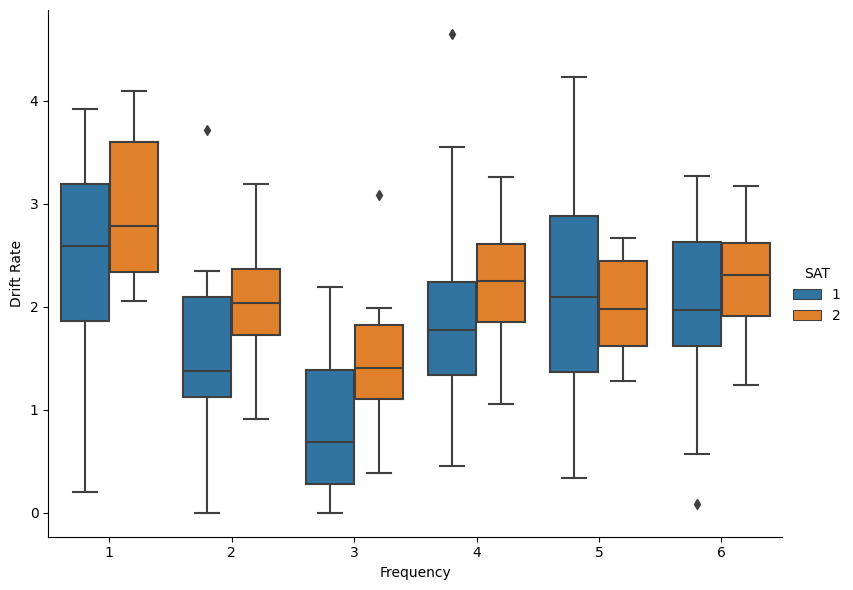

In [46]:
sns.catplot(data=df_all, x="Frequency", y="Drift Rate", hue="SAT", kind="box", errorbar = "ci",
            height=6, aspect=8/6)

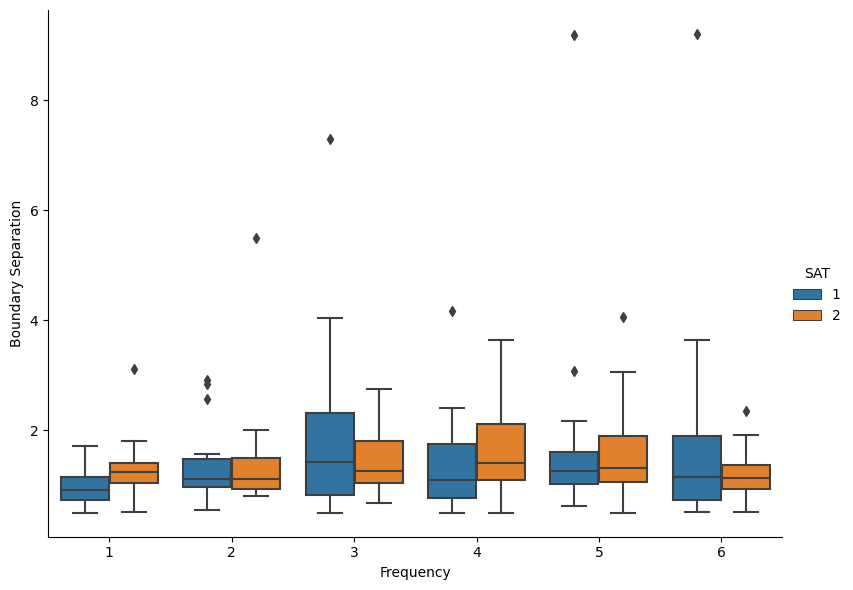

In [47]:
sns.catplot(data=df_all, x="Frequency", y="Boundary Separation", hue="SAT", kind="box",
            height=6, aspect=8/6)

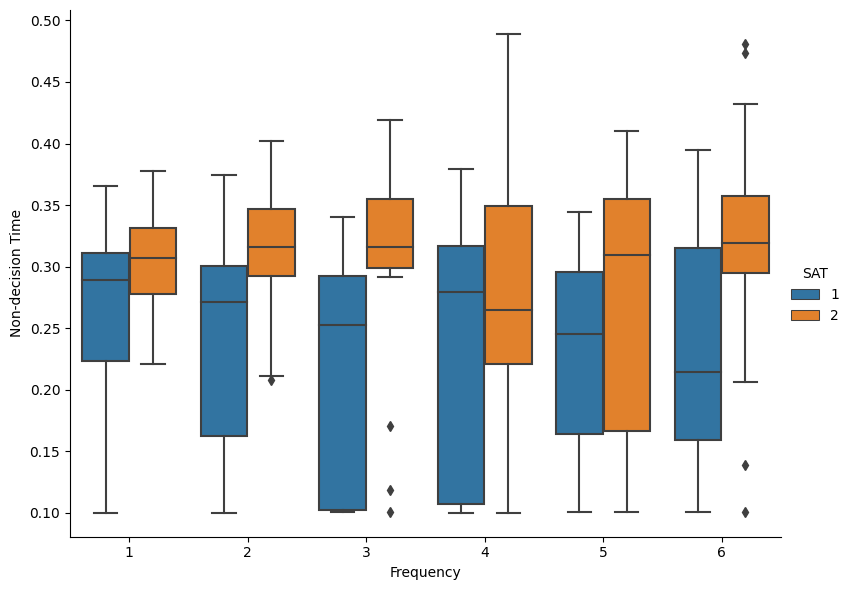

In [48]:
sns.catplot(data=df_all, x="Frequency", y="Non-decision Time", hue="SAT", kind="box",
            height=6, aspect=8/6)

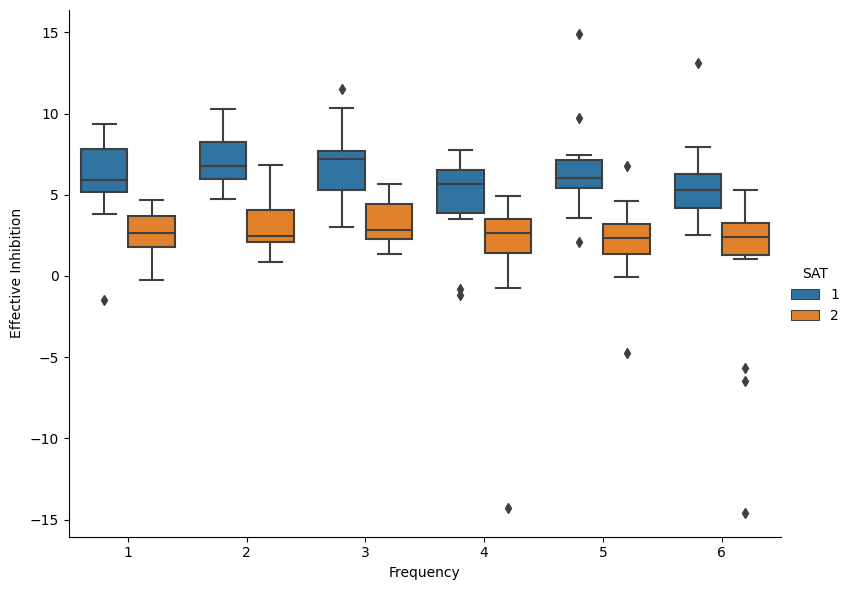

In [49]:
sns.catplot(data=df_all, x="Frequency", y="Effective Inhibition", hue="SAT", kind="box", errorbar = "ci",
            height=6, aspect=8/6)

In [53]:
df_example = df_all[df_all["Frequency"] == 6]

In [54]:
df_example_1 = df_example[df_example["SAT"] == 1]
df_example_2 = df_example[df_example["SAT"] == 2]

In [55]:
scipy.stats.ttest_rel(df_example_1["Effective Inhibition"], df_example_2["Effective Inhibition"])

Ttest_relResult(statistic=3.5101889699408733, pvalue=0.003156835503253615)

In [56]:
scipy.stats.ttest_rel(df_example_1["Drift Rate"], df_example_2["Drift Rate"])

Ttest_relResult(statistic=-1.4602448379816055, pvalue=0.16485010713161843)

In [106]:
df_example

,Unnamed: 0,Stimulus Contrast,SAT,participant,Drift Rate,Boundary Separation,Non-decision Time,Effective Inhibition
20,22,5,1,1,0.003643,0.782213,0.100955,11.614850
21,23,5,2,1,1.455478,1.034799,0.184229,8.715260
22,24,5,3,1,2.472537,0.599718,0.258114,4.351838
23,25,5,4,1,1.970795,1.113574,0.232003,8.678523
24,26,5,5,1,2.611156,1.170605,0.243964,5.327644
...,...,...,...,...,...,...,...,...
245,247,5,1,30,0.000000,1.270804,0.100128,14.764992
246,248,5,2,30,2.168604,4.345238,0.176434,13.616276
247,249,5,3,30,3.925519,0.833694,0.303050,6.235077
248,250,5,4,30,3.494954,0.748982,0.306886,6.802331


In [113]:
print(AnovaRM(data=df_example, depvar='Drift Rate',
              subject='participant', within=['SAT']).fit())

              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
SAT 31.2678 4.0000 116.0000 0.0000



In [114]:
print(AnovaRM(data=df_example, depvar='Boundary Separation',
              subject='participant', within=['SAT']).fit())


              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
SAT  2.2749 4.0000 116.0000 0.0654



In [115]:
print(AnovaRM(data=df_example, depvar='Non-decision Time',
              subject='participant', within=['SAT']).fit())


              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
SAT 18.2300 4.0000 116.0000 0.0000



### Simulated data from DDM using parameter from the dataset
### Then fit with OUM

In [58]:
df_EJ2008 = pd.read_csv('DDMresultSAT3.csv')
df_EJ2008

,Unnamed: 0,Frequency,SAT,Participant,Drift Rate,Boundary Separation,Non-decision Time,participant
0,2,1,1,NaN,5.035512,0.932458,0.349689,1.0
1,3,1,2,NaN,5.512121,0.787950,0.375921,1.0
2,4,2,1,NaN,3.105129,0.598938,0.374896,1.0
3,5,2,2,NaN,3.693656,1.045893,0.355398,1.0
4,6,3,1,NaN,1.806204,0.976843,0.347506,1.0
...,...,...,...,...,...,...,...,...
187,189,4,2,NaN,2.714846,1.094988,0.399745,17.0
188,190,5,1,NaN,4.893035,1.360448,0.322518,17.0
189,191,5,2,NaN,3.985778,1.670294,0.400627,17.0
190,192,6,1,NaN,2.897781,1.130180,0.236357,17.0


In [60]:
#data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['Participant', 'Drift Rate','Boundary Separation','Non-decision Time','Effective Inhibition','SAT'],)

#i=1
for i in range(192):

    print(i)

    model = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=df_EJ2008["Drift Rate"][i]),   
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B = df_EJ2008["Boundary Separation"][i]),
                  overlay=OverlayNonDecision(nondectime = df_EJ2008["Non-decision Time"][i]),
                  dx=.001, dt=.001, T_dur=3)

    sol = model.solve()
    samp = sol.resample(1000)


    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-10, maxval=15)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=8)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    df_sub = pd.DataFrame(columns = ['Frequency', 'SAT', 'Participant', 'v','a','ter','k'],)

    df_sub = pd.DataFrame({
                           'SAT':df_EJ2008["SAT"][i], 
                           'Participant': df_EJ2008["participant"][i],
                           'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                           'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                           'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime']),
                           'Effective Inhibition': np.array(model_fit.parameters()['drift']['x'])
                          }, index=[i])

    df_all = df_all.append(df_sub)

    print(df_sub)


0


Info: Params [5.36923776 2.8092962  0.95264216 0.36477043] gave -2810.9503804627634


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
1    2          1.0    5.369238             0.952642            0.36477   

   Effective Inhibition  
1              2.809296  
1


Info: Params [ 3.16599401 -2.4762088   0.52208309  0.38121238] gave -1603.4358143637019


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1          1.0    3.165994             0.522083           0.381212   

   Effective Inhibition  
2             -2.476209  
2


Info: Params [3.52758054 0.49587223 0.99435506 0.36352536] gave -1370.8406781870171


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
3    2          1.0    3.527581             0.994355           0.363525   

   Effective Inhibition  
3              0.495872  
3


Info: Params [ 1.83908363 -1.02784756  0.86606876  0.36588087] gave 541.1941499007752


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
4    1          1.0    1.839084             0.866069           0.365881   

   Effective Inhibition  
4             -1.027848  
4


Info: Params [1.87362579 1.12006733 0.69165079 0.38136583] gave -292.86630620303197


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
5    2          1.0    1.873626             0.691651           0.381366   

   Effective Inhibition  
5              1.120067  
5


Info: Params [ 5.35969169 -6.24162388  0.743205    0.35344186] gave -1628.7413165622902


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
6    1          1.0    5.359692             0.743205           0.353442   

   Effective Inhibition  
6             -6.241624  
6


Info: Params [ 4.06236228 -1.51102028  0.63825848  0.40275558] gave -2045.2054425103684


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
7    2          1.0    4.062362             0.638258           0.402756   

   Effective Inhibition  
7              -1.51102  
7


Info: Params [4.25187525 1.04129458 0.85958893 0.34809459] gave -2122.5073489462866


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
8    1          1.0    4.251875             0.859589           0.348095   

   Effective Inhibition  
8              1.041295  
8


Info: Params [4.18297942 3.04504535 1.62220119 0.32204623] gave -1917.0364566715593


   SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
9    2          1.0    4.182979             1.622201           0.322046   

   Effective Inhibition  
9              3.045045  
9


Info: Params [5.25215472 2.71956818 1.24035727 0.31824392] gave -2597.7951706166464


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
10    1          1.0    5.252155             1.240357           0.318244   

    Effective Inhibition  
10              2.719568  
10


Info: Params [4.58165527 3.85726076 3.81885264 0.17968098] gave -2120.702743226829


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
11    2          1.0    4.581655             3.818853           0.179681   

    Effective Inhibition  
11              3.857261  
11


Info: Params [ 3.95003815 -0.60216733  0.74703126  0.31661408] gave -1862.7793306601443


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
12    1          3.0    3.950038             0.747031           0.316614   

    Effective Inhibition  
12             -0.602167  
12


Info: Params [5.3112274  2.0223911  2.30774945 0.32503629] gave -2176.2902154892445


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
13    2          3.0    5.311227             2.307749           0.325036   

    Effective Inhibition  
13              2.022391  
13


Info: Params [2.50748561 0.90799149 0.84037783 0.31572701] gave -724.4110983042455


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
14    1          3.0    2.507486             0.840378           0.315727   

    Effective Inhibition  
14              0.907991  
14


Info: Params [ 3.84298571 -0.41397204  1.48517684  0.34387272] gave -809.5960322400352


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
15    2          3.0    3.842986             1.485177           0.343873   

    Effective Inhibition  
15             -0.413972  
15


Info: Params [2.46482348 0.69361106 0.97240858 0.30104244] gave -504.851428086832


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
16    1          3.0    2.464823             0.972409           0.301042   

    Effective Inhibition  
16              0.693611  
16


Info: Params [ 3.57715286 -2.67916936  1.00125368  0.45777366] gave -420.73936895506154


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
17    2          3.0    3.577153             1.001254           0.457774   

    Effective Inhibition  
17             -2.679169  
17


Info: Params [2.49241896 0.9051411  0.99262948 0.26430687] gave -550.3655660981858


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
18    1          3.0    2.492419             0.992629           0.264307   

    Effective Inhibition  
18              0.905141  
18


Info: Params [ 4.38457332 -0.18676055  2.67962438  0.109338  ] gave -533.8115109488277


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
19    2          3.0    4.384573             2.679624           0.109338   

    Effective Inhibition  
19             -0.186761  
19


Info: Params [ 2.9019843  -3.65317992  0.51746129  0.30342682] gave -1257.4665403117106


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
20    1          3.0    2.901984             0.517461           0.303427   

    Effective Inhibition  
20              -3.65318  
20


Info: Params [ 3.12802596 -0.71206613  1.38495307  0.33258728] gave -184.1694880030985


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
21    2          3.0    3.128026             1.384953           0.332587   

    Effective Inhibition  
21             -0.712066  
21


Info: Params [3.89695493 2.55001918 1.1776607  0.31854448] gave -1875.0062166982239


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
22    1          3.0    3.896955             1.177661           0.318544   

    Effective Inhibition  
22              2.550019  
22


Info: Params [ 4.19413078 -0.4596163   1.71606128  0.33469759] gave -838.8165771173344


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
23    2          3.0    4.194131             1.716061           0.334698   

    Effective Inhibition  
23             -0.459616  
23


Info: Params [5.39571904 3.01722153 0.64256856 0.32766632] gave -3184.7223634892516


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
24    1          4.0    5.395719             0.642569           0.327666   

    Effective Inhibition  
24              3.017222  
24


Info: Params [4.62450194 3.62709706 2.86683893 0.18171073] gave -2150.5740946031688


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
25    2          4.0    4.624502             2.866839           0.181711   

    Effective Inhibition  
25              3.627097  
25


Info: Params [3.5996774  2.73331339 0.86844949 0.30545344] gave -1913.0883184473582


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
26    1          4.0    3.599677             0.868449           0.305453   

    Effective Inhibition  
26              2.733313  
26


Info: Params [4.96172894 0.65433806 1.25086823 0.33319838] gave -2074.650142097637


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
27    2          4.0    4.961729             1.250868           0.333198   

    Effective Inhibition  
27              0.654338  
27


Info: Params [ 3.15539832 -1.32708168  0.72639066  0.34393922] gave -1179.0285596742197


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
28    1          4.0    3.155398             0.726391           0.343939   

    Effective Inhibition  
28             -1.327082  
28


Info: Params [2.99055173 0.76334255 1.1093425  0.3224947 ] gave -899.8047945430952


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
29    2          4.0    2.990552             1.109343           0.322495   

    Effective Inhibition  
29              0.763343  
29


Info: Params [5.32738619 2.4251801  0.80170503 0.34166464] gave -2898.712053000527


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
30    1          4.0    5.327386             0.801705           0.341665   

    Effective Inhibition  
30               2.42518  
30


Info: Params [ 5.55369838 -0.27556433  1.30928223  0.34639527] gave -2084.1971747511993


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
31    2          4.0    5.553698             1.309282           0.346395   

    Effective Inhibition  
31             -0.275564  
31


Info: Params [ 4.2780361  -2.37179828  0.51629964  0.33120387] gave -2446.672424379758


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
32    1          4.0    4.278036               0.5163           0.331204   

    Effective Inhibition  
32             -2.371798  
32


Info: Params [4.22589174 2.33674419 1.6486671  0.31865803] gave -1844.467751262771


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
33    2          4.0    4.225892             1.648667           0.318658   

    Effective Inhibition  
33              2.336744  
33


Info: Params [ 5.03575744 -0.67319321  0.70703122  0.31312931] gave -2595.530147769622


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
34    1          4.0    5.035757             0.707031           0.313129   

    Effective Inhibition  
34             -0.673193  
34


Info: Params [3.64771715 1.48988915 1.29784973 0.3271009 ] gave -1434.795306064098


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
35    2          4.0    3.647717              1.29785           0.327101   

    Effective Inhibition  
35              1.489889  
35


Info: Params [ 6.         -1.19181309  0.67167198  0.31990051] gave -3103.2847643875534


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
36    1          5.0         6.0             0.671672           0.319901   

    Effective Inhibition  
36             -1.191813  
36


Info: Params [4.65672984 1.50113045 1.70784368 0.30468954] gave -1848.5797791114828


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
37    2          5.0     4.65673             1.707844            0.30469   

    Effective Inhibition  
37               1.50113  
37


Info: Params [5.84902086 3.05038512 1.16539289 0.31570567] gave -2990.827054978016


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
38    1          5.0    5.849021             1.165393           0.315706   

    Effective Inhibition  
38              3.050385  
38


Info: Params [ 5.09446309 -3.99724432  0.90616495  0.42918405] gave -1450.1654263034343


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
39    2          5.0    5.094463             0.906165           0.429184   

    Effective Inhibition  
39             -3.997244  
39


Info: Params [ 4.29363604 -0.99995944  0.84154469  0.33573089] gave -1816.8540825559753


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
40    1          5.0    4.293636             0.841545           0.335731   

    Effective Inhibition  
40             -0.999959  
40


Info: Params [ 5.19953326 -4.66366267  0.73531815  0.47853451] gave -1943.348765790718


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
41    2          5.0    5.199533             0.735318           0.478535   

    Effective Inhibition  
41             -4.663663  
41


Info: Params [4.87195574 4.81872654 2.17837194 0.23385703] gave -2521.8989684494777


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
42    1          5.0    4.871956             2.178372           0.233857   

    Effective Inhibition  
42              4.818727  
42


Info: Params [ 4.50206055 -1.65015122  0.95341646  0.40397472] gave -1598.125585657166


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
43    2          5.0    4.502061             0.953416           0.403975   

    Effective Inhibition  
43             -1.650151  
43


Info: Params [ 5.39905703 -2.30243957  0.50384639  0.37401032] gave -3132.165762443538


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
44    1          5.0    5.399057             0.503846            0.37401   

    Effective Inhibition  
44              -2.30244  
44


Info: Params [ 6.         -6.3729395   0.90343321  0.46721765] gave -1270.1221548737803


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
45    2          5.0         6.0             0.903433           0.467218   

    Effective Inhibition  
45              -6.37294  
45


Info: Params [4.06821258 2.06915819 0.94841758 0.28216402] gave -2069.478426044823


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
46    1          5.0    4.068213             0.948418           0.282164   

    Effective Inhibition  
46              2.069158  
46


Info: Params [4.0642989  3.16199961 5.8005806  0.13607421] gave -1652.8865749651914


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
47    2          5.0    4.064299             5.800581           0.136074   

    Effective Inhibition  
47                 3.162  
47


Info: Params [ 4.24437748 -0.06870722  0.93112048  0.25588791] gave -1845.465237740504


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
48    1          6.0    4.244377              0.93112           0.255888   

    Effective Inhibition  
48             -0.068707  
48


Info: Params [4.68986705 3.33958414 1.59300687 0.34165107] gave -2294.545452745391


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
49    2          6.0    4.689867             1.593007           0.341651   

    Effective Inhibition  
49              3.339584  
49


Info: Params [ 2.38876217 -0.14676744  0.98553137  0.22430995] gave -204.3545105880615


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
50    1          6.0    2.388762             0.985531            0.22431   

    Effective Inhibition  
50             -0.146767  
50


Info: Params [3.71829889 0.744709   1.15799145 0.40954307] gave -1439.5893391028471


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
51    2          6.0    3.718299             1.157991           0.409543   

    Effective Inhibition  
51              0.744709  
51


Info: Params [ 1.16815813 -0.16077323  0.98809831  0.20911524] gave 1589.5455132288575


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
52    1          6.0    1.168158             0.988098           0.209115   

    Effective Inhibition  
52             -0.160773  
52


Info: Params [2.85512667 0.49347792 1.14911943 0.42020037] gave -674.993144237388


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
53    2          6.0    2.855127             1.149119             0.4202   

    Effective Inhibition  
53              0.493478  
53


Info: Params [ 1.83893692 -0.28278533  0.93439015  0.2107236 ] gave 457.46320903205594


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
54    1          6.0    1.838937              0.93439           0.210724   

    Effective Inhibition  
54             -0.282785  
54


Info: Params [ 6.         -2.9604808   1.24406373  0.40586377] gave -1462.2106306913597


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
55    2          6.0         6.0             1.244064           0.405864   

    Effective Inhibition  
55             -2.960481  
55


Info: Params [ 2.18980741 -1.83606502  0.81406195  0.28894248] gave 174.4635560108732


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
56    1          6.0    2.189807             0.814062           0.288942   

    Effective Inhibition  
56             -1.836065  
56


Info: Params [3.85257803 1.26719877 1.38534252 0.38411703] gave -1468.812179921622


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
57    2          6.0    3.852578             1.385343           0.384117   

    Effective Inhibition  
57              1.267199  
57


Info: Params [ 1.79478745 -0.49661673  1.03867489  0.17495392] gave 766.3057907655947


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
58    1          6.0    1.794787             1.038675           0.174954   

    Effective Inhibition  
58             -0.496617  
58


Info: Params [ 4.49131602 -0.84866759  1.27000075  0.32937298] gave -1336.6727680253248


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
59    2          6.0    4.491316             1.270001           0.329373   

    Effective Inhibition  
59             -0.848668  
59


Info: Params [ 0.8337192  -0.26968149  0.68253827  0.18149564] gave 1229.3026086201007


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
60    1          7.0    0.833719             0.682538           0.181496   

    Effective Inhibition  
60             -0.269681  
60


Info: Params [ 5.55426245 -3.31093803  1.1821085   0.25408375] gave -1201.2132763769973


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
61    2          7.0    5.554262             1.182108           0.254084   

    Effective Inhibition  
61             -3.310938  
61


Info: Params [0.03852419 1.19608816 1.10080895 0.20120434] gave 2572.837109170148


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
62    1          7.0    0.038524             1.100809           0.201204   

    Effective Inhibition  
62              1.196088  
62


Info: Params [ 5.33605976 -5.08475676  1.04408314  0.33316084] gave -658.3808881284425


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
63    2          7.0     5.33606             1.044083           0.333161   

    Effective Inhibition  
63             -5.084757  
63


Info: Params [0.03196866 0.01218652 0.91136033 0.18913705] gave 2703.9202546600377


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
64    1          7.0    0.031969              0.91136           0.189137   

    Effective Inhibition  
64              0.012187  
64


Info: Params [1.38008973 0.08417117 1.24180832 0.24480478] gave 1474.370369025578


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
65    2          7.0     1.38009             1.241808           0.244805   

    Effective Inhibition  
65              0.084171  
65


Info: Params [ 3.61374323 -1.13768725  0.90781754  0.25120726] gave -1181.4097855907453


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
66    1          7.0    3.613743             0.907818           0.251207   

    Effective Inhibition  
66             -1.137687  
66


Info: Params [ 2.79565021 -0.32200172  1.17316576  0.30398828] gave -324.4738528376461


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
67    2          7.0     2.79565             1.173166           0.303988   

    Effective Inhibition  
67             -0.322002  
67


Info: Params [ 4.73383669 -0.37400904  1.23060342  0.20896889] gave -1698.080727243283


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
68    1          7.0    4.733837             1.230603           0.208969   

    Effective Inhibition  
68             -0.374009  
68


Info: Params [ 2.26355675 -0.6230405   0.92281706  0.35438823] gave -22.04727038892817


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
69    2          7.0    2.263557             0.922817           0.354388   

    Effective Inhibition  
69             -0.623041  
69


Info: Params [ 3.43778345 -2.98974717  0.71178293  0.26919689] gave -1136.2374219433973


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
70    1          7.0    3.437783             0.711783           0.269197   

    Effective Inhibition  
70             -2.989747  
70


Info: Params [ 6.         -5.089957    1.12923738  0.32933395] gave -833.1411682501467


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
71    2          7.0         6.0             1.129237           0.329334   

    Effective Inhibition  
71             -5.089957  
71


Info: Params [1.20315035 0.34867211 1.14124387 0.13944516] gave 1564.0934791870327


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
72    1          8.0     1.20315             1.141244           0.139445   

    Effective Inhibition  
72              0.348672  
72


Info: Params [ 3.59288616 -0.67344362  1.39886734  0.40126205] gave -596.061954306898


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
73    2          8.0    3.592886             1.398867           0.401262   

    Effective Inhibition  
73             -0.673444  
73


Info: Params [0.46659222 0.79510901 1.21588875 0.1546298 ] gave 2645.500334727792


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
74    1          8.0    0.466592             1.215889            0.15463   

    Effective Inhibition  
74              0.795109  
74


Info: Params [ 1.82882442 -0.00224734  1.8429285   0.34806608] gave 1274.403146806722


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
75    2          8.0    1.828824             1.842928           0.348066   

    Effective Inhibition  
75             -0.002247  
75


Info: Params [0.         1.16063283 1.58581334 0.1053235 ] gave 2929.652285602466


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
76    1          8.0         0.0             1.585813           0.105323   

    Effective Inhibition  
76              1.160633  
76


Info: Params [0.55579368 0.79925276 1.28812414 0.28474533] gave 2584.765062660998


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
77    2          8.0    0.555794             1.288124           0.284745   

    Effective Inhibition  
77              0.799253  
77


Info: Params [1.03837533 0.02176481 1.01279684 0.19500965] gave 1827.1304723595072


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
78    1          8.0    1.038375             1.012797            0.19501   

    Effective Inhibition  
78              0.021765  
78


Info: Params [ 1.94128792 -0.20261937  1.82547821  0.27819924] gave 1272.7228579602943


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
79    2          8.0    1.941288             1.825478           0.278199   

    Effective Inhibition  
79             -0.202619  
79


Info: Params [0.98217238 0.12569498 1.11939371 0.1873935 ] gave 2034.1679799375634


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
80    1          8.0    0.982172             1.119394           0.187394   

    Effective Inhibition  
80              0.125695  
80


Info: Params [ 2.92812674 -0.34159574  2.36897105  0.16746233] gave 643.0707999829532


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
81    2          8.0    2.928127             2.368971           0.167462   

    Effective Inhibition  
81             -0.341596  
81


Info: Params [0.53403123 0.69255773 0.82423214 0.20790587] gave 1813.247914104586


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
82    1          8.0    0.534031             0.824232           0.207906   

    Effective Inhibition  
82              0.692558  
82


Info: Params [ 2.30141649 -0.43476029  1.94582196  0.11501792] gave 1132.7298012003698


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
83    2          8.0    2.301416             1.945822           0.115018   

    Effective Inhibition  
83              -0.43476  
83


Info: Params [5.46196813 5.40767547 0.84778574 0.3778087 ] gave -3147.4980624629006


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
84    1          9.0    5.461968             0.847786           0.377809   

    Effective Inhibition  
84              5.407675  
84


Info: Params [3.76565147 3.31331382 2.32360557 0.31035242] gave -1592.8513941337833


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
85    2          9.0    3.765651             2.323606           0.310352   

    Effective Inhibition  
85              3.313314  
85


Info: Params [2.57594057 0.97622444 0.60366776 0.38976572] gave -1196.1754903636306


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
86    1          9.0    2.575941             0.603668           0.389766   

    Effective Inhibition  
86              0.976224  
86


Info: Params [ 4.43651694 -1.87585001  1.49226311  0.40847303] gave -458.0302408389091


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
87    2          9.0    4.436517             1.492263           0.408473   

    Effective Inhibition  
87              -1.87585  
87


Info: Params [ 1.36297255 -0.3132225   0.75215478  0.39829894] gave 801.2118290680229


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
88    1          9.0    1.362973             0.752155           0.398299   

    Effective Inhibition  
88             -0.313222  
88


Info: Params [2.0194078  0.1934399  1.27819831 0.40551118] gave 468.1934668568555


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
89    2          9.0    2.019408             1.278198           0.405511   

    Effective Inhibition  
89               0.19344  
89


Info: Params [4.0107638  3.00959296 0.8958812  0.36608089] gave -2145.1426493589884


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
90    1          9.0    4.010764             0.895881           0.366081   

    Effective Inhibition  
90              3.009593  
90


Info: Params [3.30933531 1.49578832 1.77489578 0.37670709] gave -989.1068140484098


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
91    2          9.0    3.309335             1.774896           0.376707   

    Effective Inhibition  
91              1.495788  
91


Info: Params [5.08722624 0.36178009 0.84757273 0.38931691] gave -2489.1594047999456


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
92    1          9.0    5.087226             0.847573           0.389317   

    Effective Inhibition  
92               0.36178  
92


Info: Params [2.6376651  0.70756964 1.9664164  0.21399836] gave -53.99542384420407


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
93    2          9.0    2.637665             1.966416           0.213998   

    Effective Inhibition  
93               0.70757  
93


Info: Params [5.28714583 6.36038586 2.10172645 0.3320439 ] gave -2883.292929868673


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
94    1          9.0    5.287146             2.101726           0.332044   

    Effective Inhibition  
94              6.360386  
94


Info: Params [3.82898954 1.87315501 2.2224159  0.33944275] gave -1342.5885718785953


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
95    2          9.0     3.82899             2.222416           0.339443   

    Effective Inhibition  
95              1.873155  
95


Info: Params [ 2.93722248 -0.87277082  0.50648402  0.29172004] gave -1622.191427810862


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
96    1         10.0    2.937222             0.506484            0.29172   

    Effective Inhibition  
96             -0.872771  
96


Info: Params [4.93045877 0.85549027 1.00186997 0.34203987] gave -2300.9533694464503


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
97    2         10.0    4.930459              1.00187            0.34204   

    Effective Inhibition  
97               0.85549  
97


Info: Params [3.08199059 0.178972   1.13556917 0.26039048] gave -806.8780668879394


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
98    1         10.0    3.081991             1.135569            0.26039   

    Effective Inhibition  
98              0.178972  
98


Info: Params [3.52538522 1.0107282  1.05004301 0.347297  ] gave -1400.7735466902168


    SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
99    2         10.0    3.525385             1.050043           0.347297   

    Effective Inhibition  
99              1.010728  
99


Info: Params [0.9130607  0.5747228  0.68673552 0.28824005] gave 920.0549426574661


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
100    1         10.0    0.913061             0.686736            0.28824   

     Effective Inhibition  
100              0.574723  
100


Info: Params [3.37198153 1.04244257 1.2678718  0.37012621] gave -1151.485658583344


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
101    2         10.0    3.371982             1.267872           0.370126   

     Effective Inhibition  
101              1.042443  
101


Info: Params [ 4.73005637 -1.82399681  1.0093086   0.26712445] gave -1610.0400261905793


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
102    1         10.0    4.730056             1.009309           0.267124   

     Effective Inhibition  
102             -1.823997  
102


Info: Params [3.44344863 0.36109753 1.17505117 0.33533902] gave -1104.572996279394


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
103    2         10.0    3.443449             1.175051           0.335339   

     Effective Inhibition  
103              0.361098  
103


Info: Params [4.62538612 2.20890267 1.55220452 0.23433036] gave -2047.3464784405965


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
104    1         10.0    4.625386             1.552205            0.23433   

     Effective Inhibition  
104              2.208903  
104


Info: Params [3.87722839 1.08757263 2.10376767 0.26396897] gave -1168.3131104097733


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
105    2         10.0    3.877228             2.103768           0.263969   

     Effective Inhibition  
105              1.087573  
105


Info: Params [ 4.32033972 -0.73848486  0.83558929  0.29091386] gave -1912.043871024885


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
106    1         10.0     4.32034             0.835589           0.290914   

     Effective Inhibition  
106             -0.738485  
106


Info: Params [3.20334771 0.49225723 1.12233693 0.31054815] gave -996.6559486838604


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
107    2         10.0    3.203348             1.122337           0.310548   

     Effective Inhibition  
107              0.492257  
107


Info: Params [4.8369399  4.0321328  0.98954015 0.32010754] gave -2685.5107598593163


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
108    1         11.0     4.83694              0.98954           0.320108   

     Effective Inhibition  
108              4.032133  
108


Info: Params [4.87855953 4.97305946 2.47854654 0.25930239] gave -2522.1374877898584


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
109    2         11.0     4.87856             2.478547           0.259302   

     Effective Inhibition  
109              4.973059  
109


Info: Params [ 1.74052604 -2.40225749  0.57815604  0.35254331] gave 75.0236491243005


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
110    1         11.0    1.740526             0.578156           0.352543   

     Effective Inhibition  
110             -2.402257  
110


Info: Params [ 4.37124618 -1.14939891  0.92915017  0.40045905] gave -1679.7151289440726


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
111    2         11.0    4.371246              0.92915           0.400459   

     Effective Inhibition  
111             -1.149399  
111


Info: Params [1.26532288 0.68015515 0.81914915 0.32211062] gave 860.9120670686102


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
112    1         11.0    1.265323             0.819149           0.322111   

     Effective Inhibition  
112              0.680155  
112


Info: Params [ 2.09611869 -0.84761744  0.85341269  0.37766031] gave 118.1539128673563


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
113    2         11.0    2.096119             0.853413            0.37766   

     Effective Inhibition  
113             -0.847617  
113


Info: Params [ 2.38702655 -0.51201059  0.75818148  0.33196762] gave -485.06308121297775


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
114    1         11.0    2.387027             0.758181           0.331968   

     Effective Inhibition  
114             -0.512011  
114


Info: Params [4.02425486 2.17379213 2.85731656 0.22277788] gave -1471.878825982451


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
115    2         11.0    4.024255             2.857317           0.222778   

     Effective Inhibition  
115              2.173792  
115


Info: Params [ 4.03277098 -1.30468306  0.80084282  0.34888059] gave -1672.0300038418886


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
116    1         11.0    4.032771             0.800843           0.348881   

     Effective Inhibition  
116             -1.304683  
116


Info: Params [ 5.42733012 -0.83238428  1.43256584  0.37331276] gave -1735.4768566386165


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
117    2         11.0     5.42733             1.432566           0.373313   

     Effective Inhibition  
117             -0.832384  
117


Info: Params [ 3.64224297 -2.10689466  0.64977041  0.35433797] gave -1644.3334037458735


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
118    1         11.0    3.642243              0.64977           0.354338   

     Effective Inhibition  
118             -2.106895  
118


Info: Params [3.90535972 1.61594079 1.84789037 0.30988465] gave -1427.5662237049019


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
119    2         11.0     3.90536              1.84789           0.309885   

     Effective Inhibition  
119              1.615941  
119


Info: Params [ 4.97746545 -0.77325133  1.45349166  0.20970041] gave -1475.9006602277045


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
120    1         12.0    4.977465             1.453492             0.2097   

     Effective Inhibition  
120             -0.773251  
120


Info: Params [ 3.30497275 -0.41733072  1.01559286  0.30133517] gave -968.4108382219099


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
121    2         12.0    3.304973             1.015593           0.301335   

     Effective Inhibition  
121             -0.417331  
121


Info: Params [1.45198612 0.7194232  0.50281419 0.3148514 ] gave -429.78933818701864


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
122    1         12.0    1.451986             0.502814           0.314851   

     Effective Inhibition  
122              0.719423  
122


Info: Params [ 2.2166205  -0.60726503  1.13512816  0.35452275] gave 373.9971579276834


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
123    2         12.0     2.21662             1.135128           0.354523   

     Effective Inhibition  
123             -0.607265  
123


Info: Params [0.8373302  0.84782227 1.00103945 0.266713  ] gave 1806.74041833894


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
124    1         12.0     0.83733             1.001039           0.266713   

     Effective Inhibition  
124              0.847822  
124


Info: Params [ 1.71678289 -0.77882582  1.12073572  0.38078799] gave 1129.045871473555


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
125    2         12.0    1.716783             1.120736           0.380788   

     Effective Inhibition  
125             -0.778826  
125


Info: Params [ 3.14016975 -0.87898671  1.45177091  0.16880019] gave -13.237716199254535


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
126    1         12.0     3.14017             1.451771             0.1688   

     Effective Inhibition  
126             -0.878987  
126


Info: Params [ 3.32010552 -1.02085502  1.33817528  0.32478942] gave -260.54860385027877


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
127    2         12.0    3.320106             1.338175           0.324789   

     Effective Inhibition  
127             -1.020855  
127


Info: Params [3.13977958 0.61931759 1.1266272  0.31665022] gave -974.5746256230223


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
128    1         12.0     3.13978             1.126627            0.31665   

     Effective Inhibition  
128              0.619318  
128


Info: Params [ 4.14120199 -1.45308121  1.56588746  0.32150348] gave -351.5825036436694


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
129    2         12.0    4.141202             1.565887           0.321503   

     Effective Inhibition  
129             -1.453081  
129


Info: Params [2.24652547 0.24431261 0.99262213 0.23282633] gave -129.06868250164763


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
130    1         12.0    2.246525             0.992622           0.232826   

     Effective Inhibition  
130              0.244313  
130


Info: Params [ 4.2096312  -2.45538204  1.46762748  0.27868507] gave 130.49062281125725


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
131    2         12.0    4.209631             1.467627           0.278685   

     Effective Inhibition  
131             -2.455382  
131


Info: Params [ 3.42270976 -2.94637438  0.730957    0.33267491] gave -1052.5616391764856


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
132    1         13.0     3.42271             0.730957           0.332675   

     Effective Inhibition  
132             -2.946374  
132


Info: Params [ 4.20458637 -0.69642109  1.62085113  0.32202251] gave -805.6725478639581


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
133    2         13.0    4.204586             1.620851           0.322023   

     Effective Inhibition  
133             -0.696421  
133


Info: Params [ 2.3478127  -0.27688832  0.87435171  0.33023244] gave -289.66239382850335


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
134    1         13.0    2.347813             0.874352           0.330232   

     Effective Inhibition  
134             -0.276888  
134


Info: Params [ 2.55481702 -1.07583264  1.00142051  0.41426836] gave -60.87129476013264


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
135    2         13.0    2.554817             1.001421           0.414268   

     Effective Inhibition  
135             -1.075833  
135


Info: Params [ 1.08620045 -0.05071534  1.028046    0.34855492] gave 1773.2467141809889


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
136    1         13.0      1.0862             1.028046           0.348555   

     Effective Inhibition  
136             -0.050715  
136


Info: Params [ 0.79824475 -0.03843884  0.73589929  0.33830545] gave 1418.2481553928178


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
137    2         13.0    0.798245             0.735899           0.338305   

     Effective Inhibition  
137             -0.038439  
137


Info: Params [2.70473279 0.11325131 1.11134958 0.32783595] gave -431.85357005143806


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
138    1         13.0    2.704733              1.11135           0.327836   

     Effective Inhibition  
138              0.113251  
138


Info: Params [ 5.78357101 -2.43328085  1.92750908  0.32823124] gave -250.82572193609542


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
139    2         13.0    5.783571             1.927509           0.328231   

     Effective Inhibition  
139             -2.433281  
139


Info: Params [3.31407339 1.34881138 1.29129163 0.32053189] gave -1184.2776350446911


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
140    1         13.0    3.314073             1.291292           0.320532   

     Effective Inhibition  
140              1.348811  
140


Info: Params [ 3.7443476  -0.99498017  1.61508051  0.38940914] gave -280.3586103461183


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
141    2         13.0    3.744348             1.615081           0.389409   

     Effective Inhibition  
141              -0.99498  
141


Info: Params [ 3.50967374 -1.11182675  1.06611447  0.32176998] gave -816.027917164765


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
142    1         13.0    3.509674             1.066114            0.32177   

     Effective Inhibition  
142             -1.111827  
142


Info: Params [ 2.66253706 -0.21950109  1.33348185  0.38829274] gave -40.95399034044216


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
143    2         13.0    2.662537             1.333482           0.388293   

     Effective Inhibition  
143             -0.219501  
143


Info: Params [3.91344157 0.12541513 0.80898432 0.27420725] gave -1857.9392150347244


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
144    1         14.0    3.913442             0.808984           0.274207   

     Effective Inhibition  
144              0.125415  
144


Info: Params [ 4.98793854 -0.70663096  1.39796363  0.35531823] gave -1555.7173803427972


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
145    2         14.0    4.987939             1.397964           0.355318   

     Effective Inhibition  
145             -0.706631  
145


Info: Params [1.90515924 1.41802491 0.58623896 0.30333897] gave -608.8734200324859


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
146    1         14.0    1.905159             0.586239           0.303339   

     Effective Inhibition  
146              1.418025  
146


Info: Params [ 2.31906085 -0.54803728  1.05824393  0.38442116] gave 108.78966201812105


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
147    2         14.0    2.319061             1.058244           0.384421   

     Effective Inhibition  
147             -0.548037  
147


Info: Params [ 2.03536297 -1.39130356  0.65708243  0.34946324] gave -171.33940470999266


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
148    1         14.0    2.035363             0.657082           0.349463   

     Effective Inhibition  
148             -1.391304  
148


Info: Params [1.46015672 0.85651989 1.38972267 0.29520938] gave 1146.602596626013


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
149    2         14.0    1.460157             1.389723           0.295209   

     Effective Inhibition  
149               0.85652  
149


Info: Params [4.06226082 1.19296668 1.34091963 0.32873156] gave -1657.5902616227995


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
150    1         14.0    4.062261              1.34092           0.328732   

     Effective Inhibition  
150              1.192967  
150


Info: Params [1.82880244 1.58873079 1.07524608 0.40403145] gave 181.0308957524098


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
151    2         14.0    1.828802             1.075246           0.404031   

     Effective Inhibition  
151              1.588731  
151


Info: Params [2.90692399 0.92127366 1.31850918 0.28393022] gave -685.4472799086022


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
152    1         14.0    2.906924             1.318509            0.28393   

     Effective Inhibition  
152              0.921274  
152


Info: Params [ 2.47139209 -0.42346481  2.10491426  0.1023449 ] gave 1067.113303002348


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
153    2         14.0    2.471392             2.104914           0.102345   

     Effective Inhibition  
153             -0.423465  
153


Info: Params [3.26882417 1.45612793 1.16602599 0.32562867] gave -1271.5896162715103


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
154    1         14.0    3.268824             1.166026           0.325629   

     Effective Inhibition  
154              1.456128  
154


Info: Params [ 3.80993851 -0.50921606  2.15385594  0.37672251] gave -153.97082946134776


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
155    2         14.0    3.809939             2.153856           0.376723   

     Effective Inhibition  
155             -0.509216  
155


Info: Params [ 3.15190646 -1.14081968  0.68535832  0.33116354] gave -1284.1431763027504


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
156    1         15.0    3.151906             0.685358           0.331164   

     Effective Inhibition  
156              -1.14082  
156


Info: Params [ 4.64469361 -0.77845609  1.63774029  0.36014882] gave -1054.4687438216229


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
157    2         15.0    4.644694              1.63774           0.360149   

     Effective Inhibition  
157             -0.778456  
157


Info: Params [2.56952076 0.3693579  1.05045135 0.27232834] gave -454.49025863847703


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
158    1         15.0    2.569521             1.050451           0.272328   

     Effective Inhibition  
158              0.369358  
158


Info: Params [ 1.77159362 -0.02980168  0.79097206  0.4169991 ] gave 241.6486611110588


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
159    2         15.0    1.771594             0.790972           0.416999   

     Effective Inhibition  
159             -0.029802  
159


Info: Params [1.52096793 0.40237024 1.04336406 0.31159492] gave 889.4191458858346


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
160    1         15.0    1.520968             1.043364           0.311595   

     Effective Inhibition  
160               0.40237  
160


Info: Params [ 1.58967708 -0.45532634  1.03733101  0.45208649] gave 1070.1214472237662


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
161    2         15.0    1.589677             1.037331           0.452086   

     Effective Inhibition  
161             -0.455326  
161


Info: Params [ 1.92313661 -1.22167846  0.51902417  0.34222943] gave -564.2200136915502


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
162    1         15.0    1.923137             0.519024           0.342229   

     Effective Inhibition  
162             -1.221678  
162


Info: Params [ 4.79570414 -0.20090153  2.34303043  0.37020519] gave -965.9740303442809


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
163    2         15.0    4.795704              2.34303           0.370205   

     Effective Inhibition  
163             -0.200902  
163


Info: Params [ 3.74943679 -2.37570001  1.00913274  0.30510877] gave -678.9123253427948


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
164    1         15.0    3.749437             1.009133           0.305109   

     Effective Inhibition  
164               -2.3757  
164


Info: Params [ 3.23050289 -0.65838874  1.44140346  0.42170941] gave -236.97641428368388


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
165    2         15.0    3.230503             1.441403           0.421709   

     Effective Inhibition  
165             -0.658389  
165


Info: Params [3.00189861 2.24200592 1.24321312 0.30866975] gave -1170.2921463430848


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
166    1         15.0    3.001899             1.243213            0.30867   

     Effective Inhibition  
166              2.242006  
166


Info: Params [3.0217315  1.48869641 1.75285138 0.38992401] gave -759.0168747328183


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
167    2         15.0    3.021732             1.752851           0.389924   

     Effective Inhibition  
167              1.488696  
167


Info: Params [2.56254906 1.49826818 1.27860537 0.23581054] gave -598.3491364161982


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
168    1         16.0    2.562549             1.278605           0.235811   

     Effective Inhibition  
168              1.498268  
168


Info: Params [ 4.52761202 -1.45651489  1.05679594  0.41347735] gave -1470.4843973825978


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
169    2         16.0    4.527612             1.056796           0.413477   

     Effective Inhibition  
169             -1.456515  
169


Info: Params [ 1.47776894 -1.68055426  0.68918268  0.23141423] gave 738.6540126760573


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
170    1         16.0    1.477769             0.689183           0.231414   

     Effective Inhibition  
170             -1.680554  
170


Info: Params [3.11313917 0.25683217 1.44463246 0.40448439] gave -572.5954703639233


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
171    2         16.0    3.113139             1.444632           0.404484   

     Effective Inhibition  
171              0.256832  
171


Info: Params [1.13879295 0.43118238 1.02553858 0.2181518 ] gave 1507.5031026434876


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
172    1         16.0    1.138793             1.025539           0.218152   

     Effective Inhibition  
172              0.431182  
172


Info: Params [ 1.40528392 -0.72535004  0.84980094  0.38447212] gave 1095.4845800662724


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
173    2         16.0    1.405284             0.849801           0.384472   

     Effective Inhibition  
173              -0.72535  
173


Info: Params [ 1.14082036 -0.70130679  0.57971968  0.21189621] gave 476.55882151263756


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
174    1         16.0     1.14082              0.57972           0.211896   

     Effective Inhibition  
174             -0.701307  
174


Info: Params [ 3.80165668 -0.18337903  1.62292438  0.41066957] gave -769.3210296520999


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
175    2         16.0    3.801657             1.622924            0.41067   

     Effective Inhibition  
175             -0.183379  
175


Info: Params [ 1.10322105 -2.24481164  0.65426917  0.24027961] gave 1278.9325077985409


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
176    1         16.0    1.103221             0.654269            0.24028   

     Effective Inhibition  
176             -2.244812  
176


Info: Params [1.90501411 0.14171426 0.93840555 0.37366353] gave 257.66171204623777


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
177    2         16.0    1.905014             0.938406           0.373664   

     Effective Inhibition  
177              0.141714  
177


Info: Params [ 1.80953386 -1.32877273  1.01152329  0.22478276] gave 1013.4638253747545


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
178    1         16.0    1.809534             1.011523           0.224783   

     Effective Inhibition  
178             -1.328773  
178


Info: Params [ 2.31655169 -0.3335642   0.93593618  0.38285332] gave -131.53105028861285


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
179    2         16.0    2.316552             0.935936           0.382853   

     Effective Inhibition  
179             -0.333564  
179


Info: Params [4.49365139 4.08225838 2.27520932 0.23583364] gave -2200.2363455788786


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
180    1         17.0    4.493651             2.275209           0.235834   

     Effective Inhibition  
180              4.082258  
180


Info: Params [4.46539764 0.92896903 1.91336257 0.32776953] gave -1511.604864035458


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
181    2         17.0    4.465398             1.913363            0.32777   

     Effective Inhibition  
181              0.928969  
181


Info: Params [ 4.58206866 -1.51431068  1.00520668  0.32547761] gave -1593.4266447791279


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
182    1         17.0    4.582069             1.005207           0.325478   

     Effective Inhibition  
182             -1.514311  
182


Info: Params [2.36988391 0.30951673 0.97821148 0.39093305] gave -294.8815392808272


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
183    2         17.0    2.369884             0.978211           0.390933   

     Effective Inhibition  
183              0.309517  
183


Info: Params [ 2.05864062 -0.5241543   0.64793648  0.32943104] gave -372.99704401309936


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
184    1         17.0    2.058641             0.647936           0.329431   

     Effective Inhibition  
184             -0.524154  
184


Info: Params [ 3.38738022 -0.70954692  1.33459601  0.46057876] gave -482.1380991563916


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
185    2         17.0     3.38738             1.334596           0.460579   

     Effective Inhibition  
185             -0.709547  
185


Info: Params [ 4.29375286 -1.75347142  1.05609356  0.31813393] gave -1240.3690216407022


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
186    1         17.0    4.293753             1.056094           0.318134   

     Effective Inhibition  
186             -1.753471  
186


Info: Params [ 3.0691152  -2.53947631  0.84522531  0.42928784] gave -497.96239894260725


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
187    2         17.0    3.069115             0.845225           0.429288   

     Effective Inhibition  
187             -2.539476  
187


Info: Params [4.26434436 1.8972324  1.60332966 0.30942045] gave -1773.805518706236


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
188    1         17.0    4.264344              1.60333            0.30942   

     Effective Inhibition  
188              1.897232  
188


Info: Params [ 4.44328405 -0.75803328  1.53031561  0.42614582] gave -1043.460238152435


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
189    2         17.0    4.443284             1.530316           0.426146   

     Effective Inhibition  
189             -0.758033  
189


Info: Params [ 3.03963923 -0.38586373  1.10544432  0.24753951] gave -598.5465151787188


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
190    1         17.0    3.039639             1.105444            0.24754   

     Effective Inhibition  
190             -0.385864  
190


Info: Params [ 4.2824095  -0.09319068  2.39717867  0.25305839] gave -673.1733476780877


     SAT  Participant  Drift Rate  Boundary Separation  Non-decision Time  \
191    2         17.0     4.28241             2.397179           0.253058   

     Effective Inhibition  
191             -0.093191  
191


KeyError: 192

In [79]:
df_all1.to_csv("DDM2OUMresultEJ2008")

In [129]:
df_all1

,SAT,Participant,Drift Rate,Boundary Separation,Non-decision Time,Effective Inhibition,Drift Rate\t,Frequency
0,1,1.0,4.666795,4.303919,0.166371,4.748007,NaN,1
1,2,1.0,5.369238,0.952642,0.364770,2.809296,NaN,1
2,1,1.0,3.165994,0.522083,0.381212,-2.476209,NaN,2
3,2,1.0,3.527581,0.994355,0.363525,0.495872,NaN,2
4,1,1.0,1.839084,0.866069,0.365881,-1.027848,NaN,3
...,...,...,...,...,...,...,...,...
187,2,17.0,3.069115,0.845225,0.429288,-2.539476,NaN,4
188,1,17.0,4.264344,1.603330,0.309420,1.897232,NaN,5
189,2,17.0,4.443284,1.530316,0.426146,-0.758033,NaN,5
190,1,17.0,3.039639,1.105444,0.247540,-0.385864,NaN,6


In [72]:
Frequency = [1,1,2,2,3,3,4,4,5,5,6,6]*16
df_all1["Frequency"] = Frequency

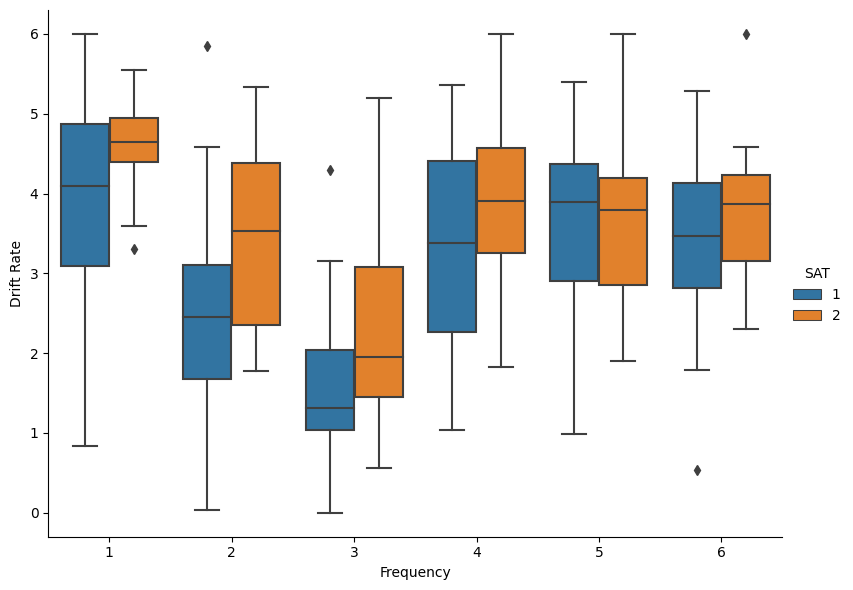

In [74]:
sns.catplot(data=df_all1, x="Frequency", y="Drift Rate", hue="SAT", kind="box", errorbar = "ci",
            height=6, aspect=8/6)

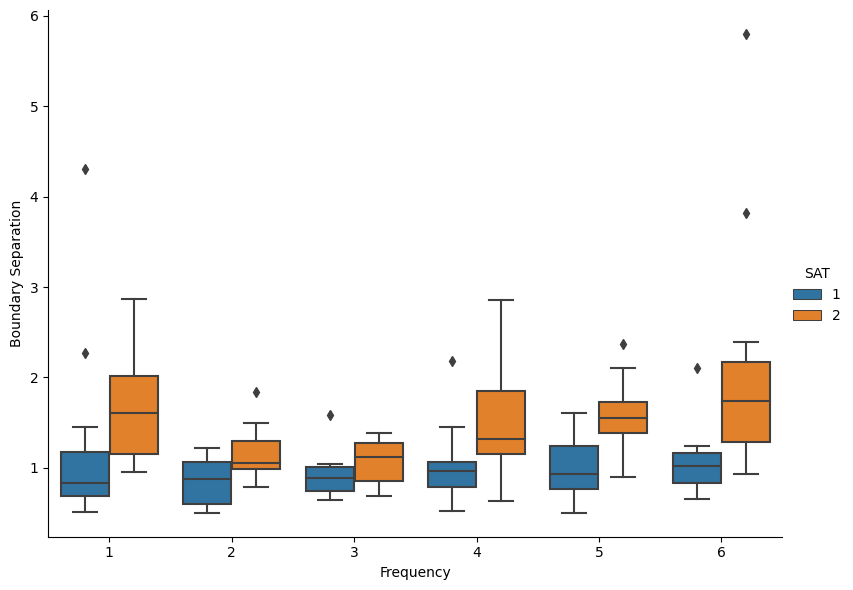

In [75]:
sns.catplot(data=df_all1, x="Frequency", y="Boundary Separation", hue="SAT", kind="box",
            height=6, aspect=8/6)

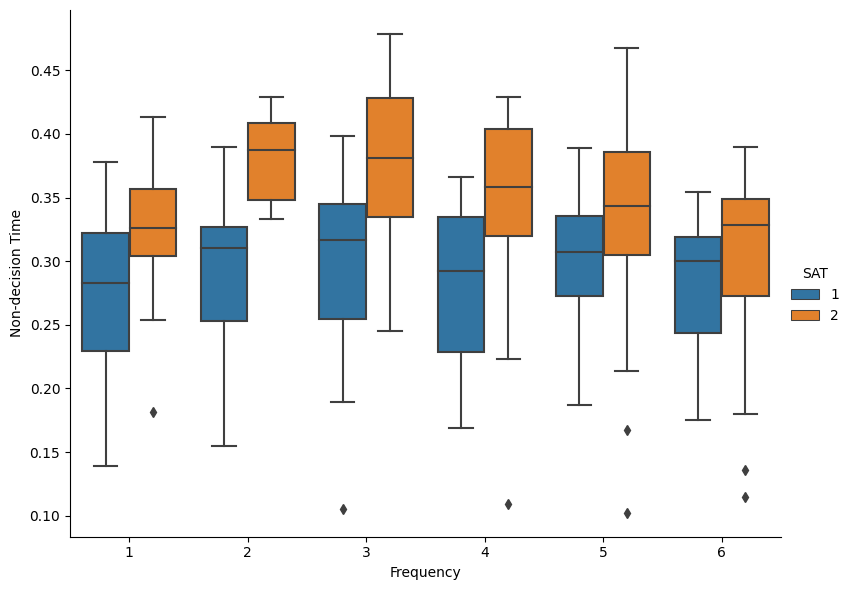

In [77]:
sns.catplot(data=df_all1, x="Frequency", y="Non-decision Time", hue="SAT", kind="box",
            height=6, aspect=8/6)

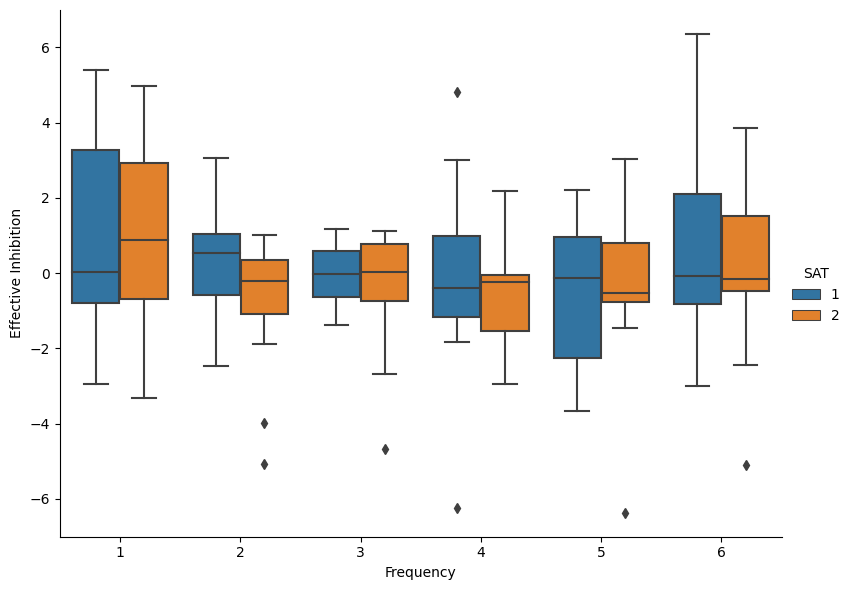

In [78]:
sns.catplot(data=df_all1, x="Frequency", y="Effective Inhibition", hue="SAT", kind="box",
            height=6, aspect=8/6)

In [143]:
df_SAT = pd.read_csv('OUMresultSAT3.csv')
df_SAT["SAT"] = df_SAT["SAT"].replace({1: 'Speed', 2: 'Accuracy'})
df_SAT = df_SAT.rename(columns={"v":"Drift Rate", 
                   "a": "Boundary Separation", 
                   "ter": "Non-decision Time", 
                   "k": "Effective Inhibition"})

In [150]:
df_SAT.to_csv("OUMResultEJ2008.csv") 

In [144]:
df_SAT

,Unnamed: 0,Frequency,SAT,Participant,Drift Rate,Boundary Separation,Non-decision Time,Effective Inhibition,participant
0,2,1,Speed,NaN,2.937041,0.500911,0.352839,-1.455700,1.0
1,3,1,Accuracy,NaN,3.694540,0.510950,0.377943,-0.241166,1.0
2,4,2,Speed,NaN,2.319819,0.547212,0.369312,4.786906,1.0
3,5,2,Accuracy,NaN,2.279193,1.033062,0.328917,4.690587,1.0
4,6,3,Speed,NaN,0.886158,0.584757,0.340132,3.030561,1.0
...,...,...,...,...,...,...,...,...,...
187,189,4,Accuracy,NaN,2.590473,2.287783,0.279953,2.487798,17.0
188,190,5,Speed,NaN,2.350907,0.936035,0.311330,3.578880,17.0
189,191,5,Accuracy,NaN,2.218090,1.662080,0.329847,2.495607,17.0
190,192,6,Speed,NaN,2.007294,1.944496,0.176661,4.160661,17.0


In [145]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"])

df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Difference")

In [149]:
df_dif_melted.to_csv("OUMdifResultEJ2008.csv") 

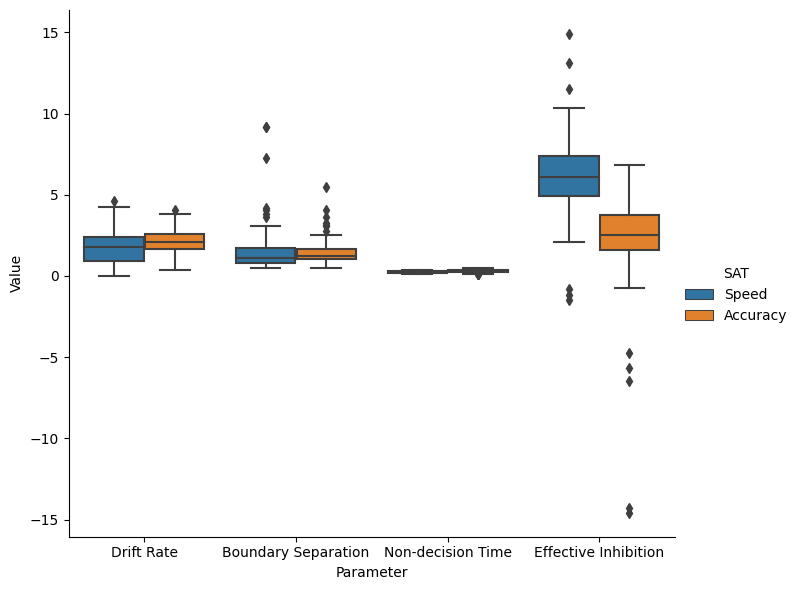

In [147]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6, hue_order = ["Speed", "Accuracy"])

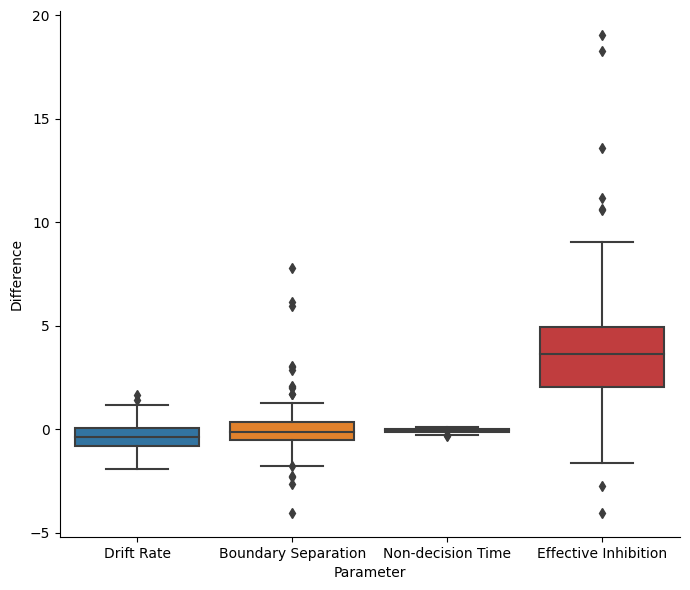

In [148]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [ ]:
param_DDM_dif